## EXP_2389_seq_prune_04_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [8 3 2 9]
8
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 4s - loss: 0.0545 - accuracy: 0.9809 - val_loss: 0.0598 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0871 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0479 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 1.9125e-05 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 4.8086e-06 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9866


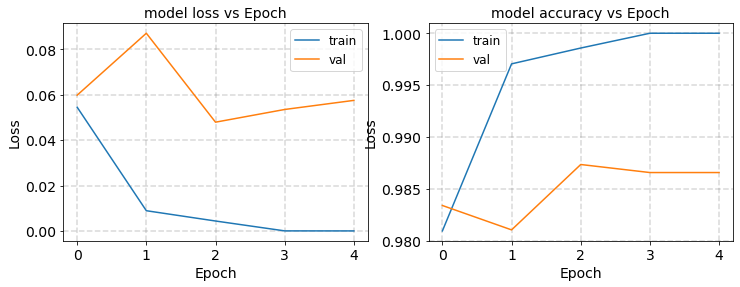

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0724 - accuracy: 0.9821 - val_loss: 0.0408 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0669 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0596 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 5.6694e-05 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 3s - loss: 1.2198e-05 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9865


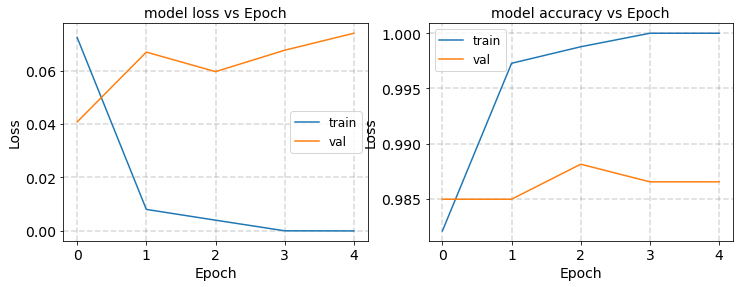

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0705 - accuracy: 0.9872 - val_loss: 0.0607 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0807 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0520 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 2.0230e-05 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 6.7433e-06 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9913


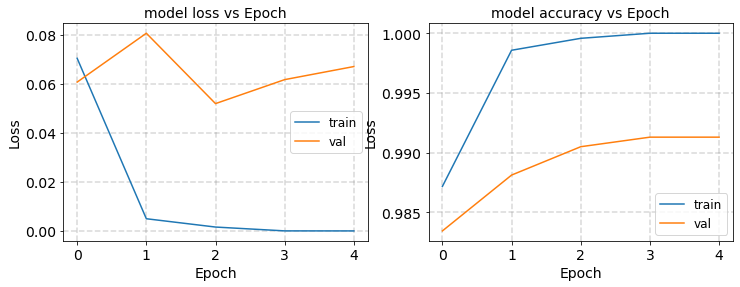

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0615 - accuracy: 0.9880 - val_loss: 0.0449 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0392 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 4.6533e-05 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 8.4604e-06 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 3.2781e-06 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 0.9922


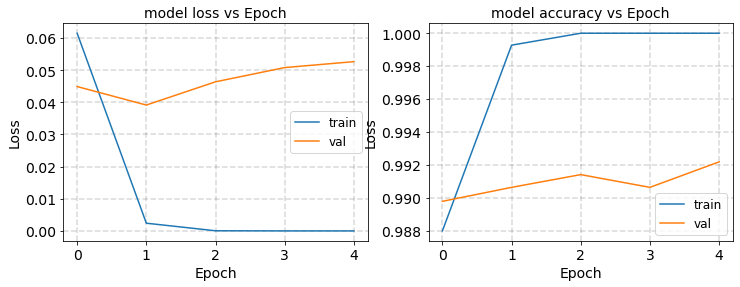

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0759 - accuracy: 0.9881 - val_loss: 0.0422 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0636 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 2.9038e-04 - accuracy: 0.9999 - val_loss: 0.0672 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 6.2723e-06 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 1.4947e-06 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9913


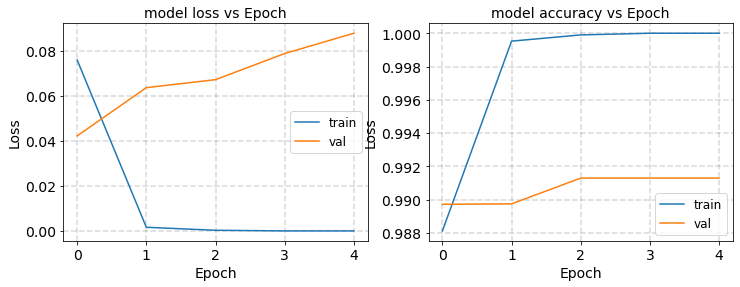

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0757 - accuracy: 0.9851 - val_loss: 0.0510 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 6s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0898 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 1.8833e-04 - accuracy: 0.9999 - val_loss: 0.1054 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 8.0302e-06 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 6s - loss: 1.6892e-06 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9858


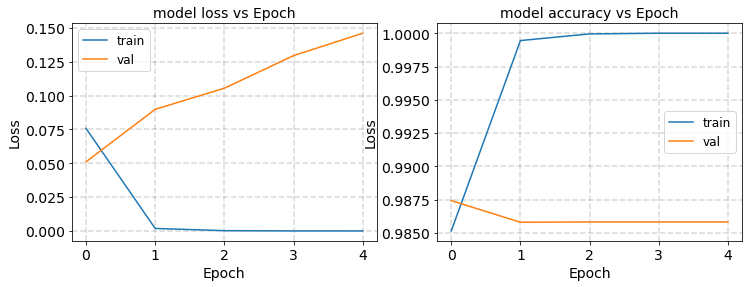

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1329 - accuracy: 0.9728 - val_loss: 0.0668 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0902 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 8.0228e-04 - accuracy: 0.9998 - val_loss: 0.1179 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 4.3521e-05 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 1.5367e-05 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9850


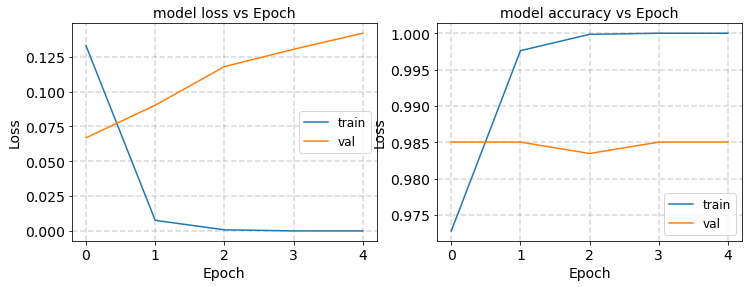

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0693 - accuracy: 0.9870 - val_loss: 0.0875 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 6s - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0690 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 6s - loss: 1.4674e-04 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 2.0576e-05 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 6.8187e-06 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9866


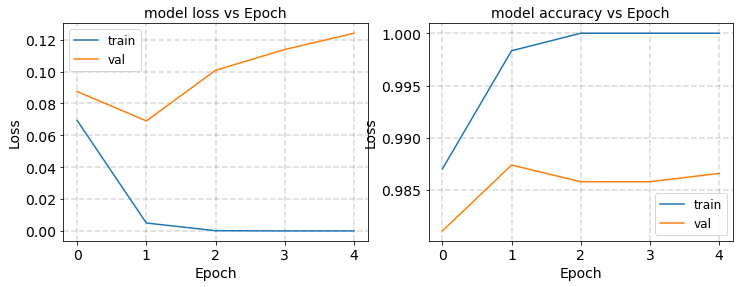

round2 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 7s - loss: 0.1092 - accuracy: 0.9856 - val_loss: 0.0533 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 6s - loss: 8.2219e-04 - accuracy: 0.9998 - val_loss: 0.0451 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 6s - loss: 3.3032e-05 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 6s - loss: 9.2626e-06 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 6s - loss: 3.1005e-06 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9953


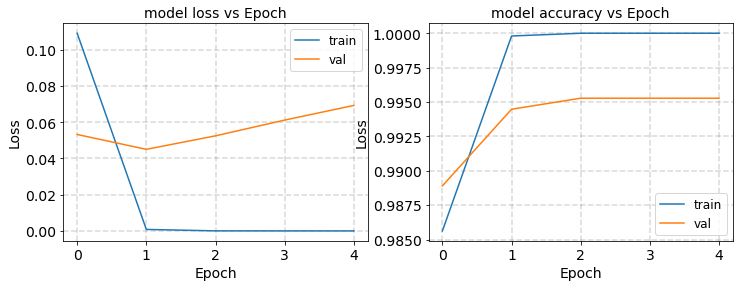

8
Epoch 1/5
1250/1250 - 6s - loss: 0.1094 - accuracy: 0.9808 - val_loss: 0.0671 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 6s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0862 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 1.4975e-04 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 2.7578e-05 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 6s - loss: 9.9105e-06 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9858


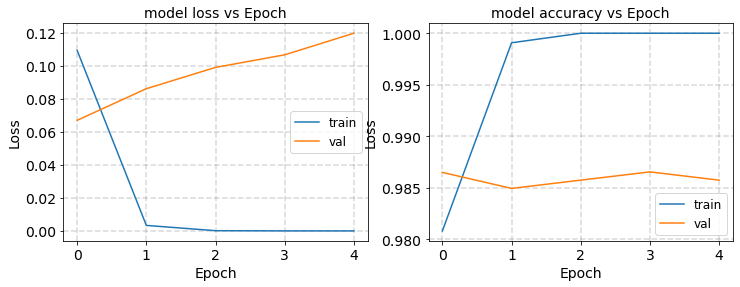

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0814 - accuracy: 0.9892 - val_loss: 0.0637 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 6s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0747 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 6s - loss: 7.4377e-05 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 6s - loss: 1.6120e-05 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 6s - loss: 6.1585e-06 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9898


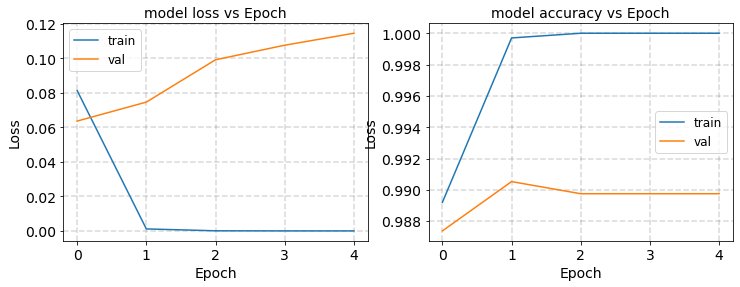

3
Epoch 1/5
1250/1250 - 6s - loss: 0.0962 - accuracy: 0.9834 - val_loss: 0.0733 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 5s - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0825 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0898 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 6s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.2115 - val_accuracy: 0.9722
Epoch 5/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0953 - val_accuracy: 0.9905


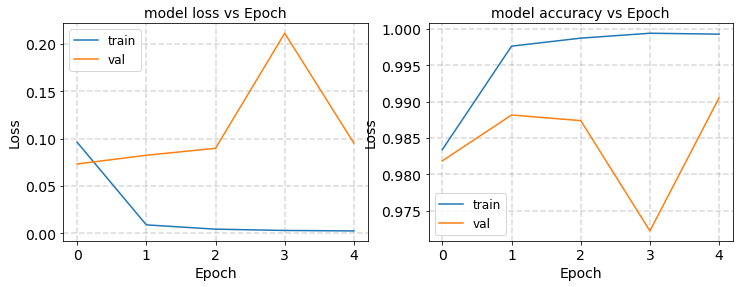

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 128)               32898     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

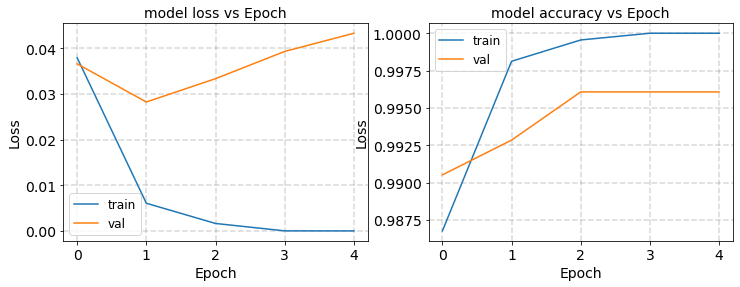

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0789 - accuracy: 0.9786 - val_loss: 0.0432 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0659 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0680 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.9961e-05 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9882


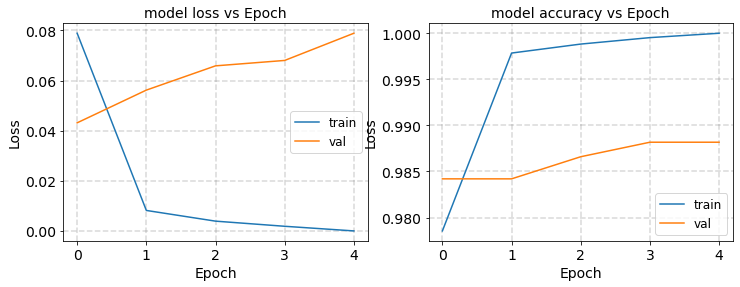

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0652 - accuracy: 0.9854 - val_loss: 0.0319 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0470 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0519 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 9.3256e-05 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9937


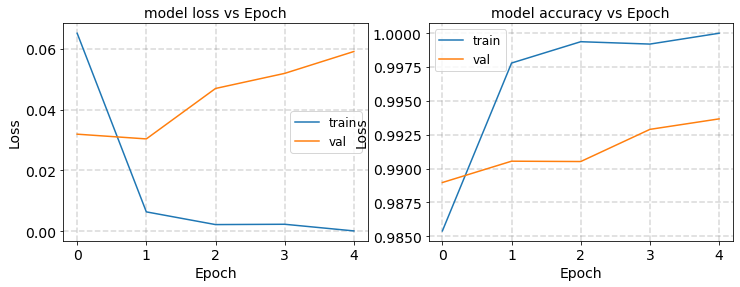

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1121 - accuracy: 0.9742 - val_loss: 0.0832 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0883 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1404 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 5s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1509 - val_accuracy: 0.9724
Epoch 5/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1356 - val_accuracy: 0.9842


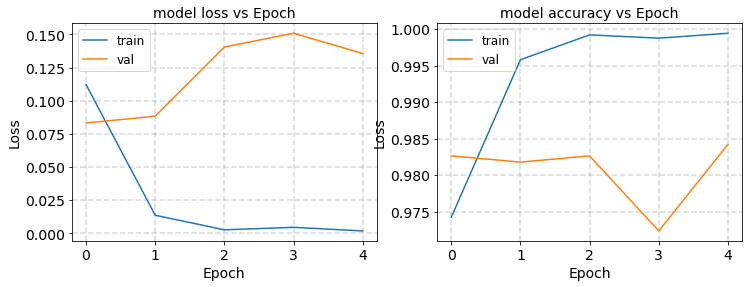

round1 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 5s - loss: 0.0604 - accuracy: 0.9873 - val_loss: 0.0505 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0728 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 5s - loss: 5.6544e-05 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 5s - loss: 9.0400e-06 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 5s - loss: 2.6301e-06 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9922


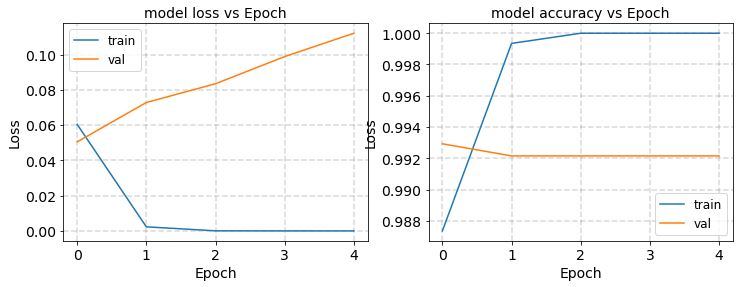

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0903 - accuracy: 0.9818 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0613 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 6.6300e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 1.7549e-05 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 6.2351e-06 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9873


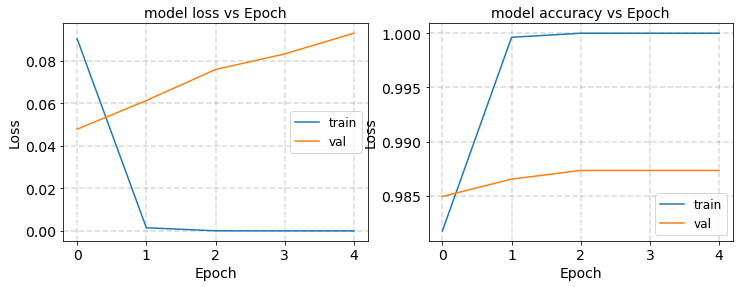

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0763 - accuracy: 0.9886 - val_loss: 0.0483 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 6s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0643 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 5s - loss: 1.0007e-04 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 5s - loss: 1.8489e-05 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 6s - loss: 7.3511e-06 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9929


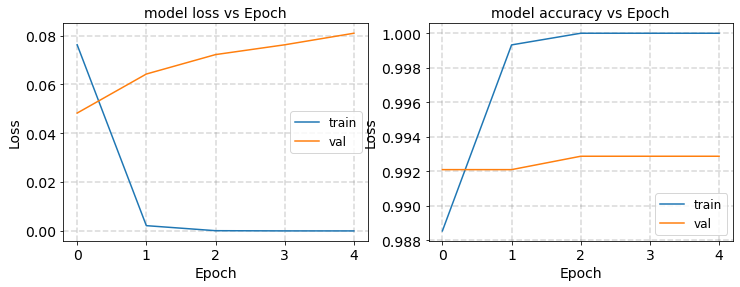

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1037 - accuracy: 0.9812 - val_loss: 0.0659 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 5s - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0988 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 6s - loss: 2.3814e-04 - accuracy: 0.9999 - val_loss: 0.1064 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 2.7842e-05 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 6.4646e-06 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9882


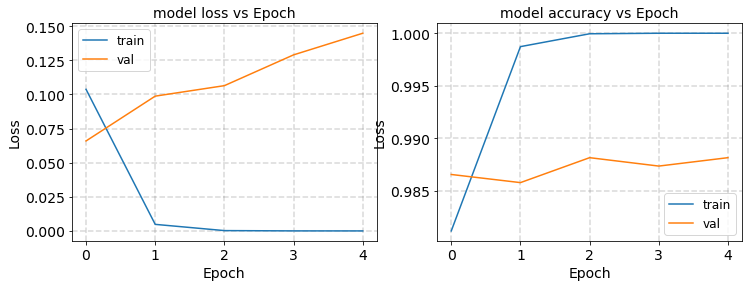

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 2.2995e-06 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 5s - loss: 9.2931e-07 - accuracy: 1.0000 - val_loss: 0.1739 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 3.9967e-07 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 1.8505e-07 - accuracy: 1.0000 - val_loss: 0.1994 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 8.8306e-08 - accuracy: 1.0000 - val_loss: 0.2117 - val_accuracy: 0.9882


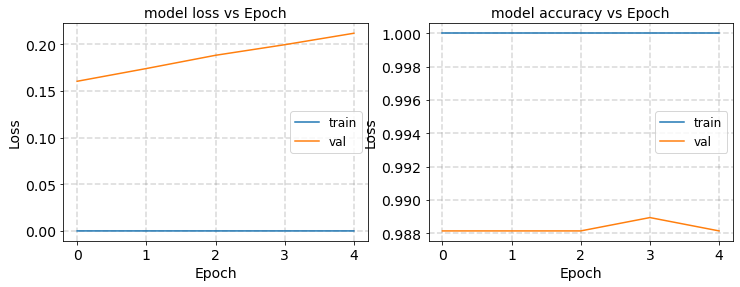

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1016 - accuracy: 0.9870 - val_loss: 0.0405 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0444 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 2.1751e-04 - accuracy: 0.9999 - val_loss: 0.0579 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.0970e-05 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 3.0163e-06 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9913


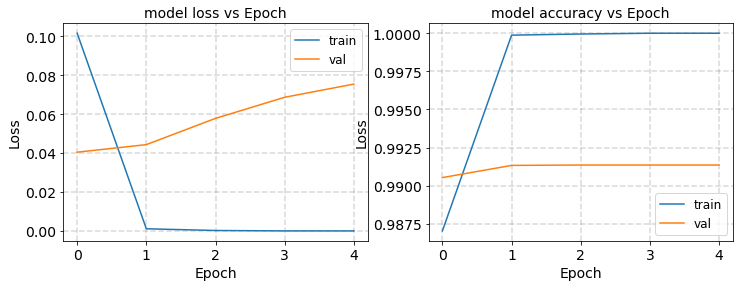

9
Epoch 1/5
1250/1250 - 6s - loss: 0.1355 - accuracy: 0.9787 - val_loss: 0.0762 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.1009 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 6s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1036 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 6s - loss: 1.3002e-04 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 2.6037e-05 - accuracy: 1.0000 - val_loss: 0.1386 - val_accuracy: 0.9858


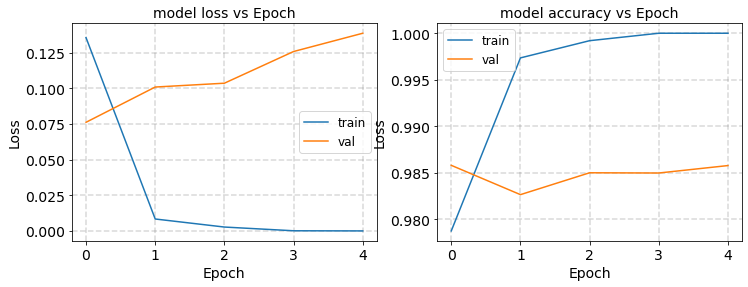

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0987 - accuracy: 0.9783 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 6s - loss: 5.9774e-04 - accuracy: 0.9999 - val_loss: 0.0781 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 6s - loss: 3.3899e-05 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 6s - loss: 1.1888e-05 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 5s - loss: 4.9337e-06 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9834


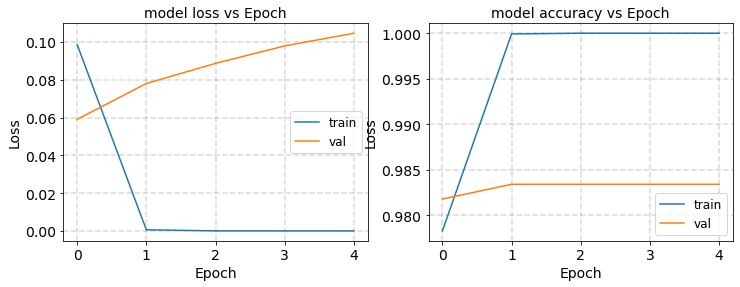

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 128)               32898     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

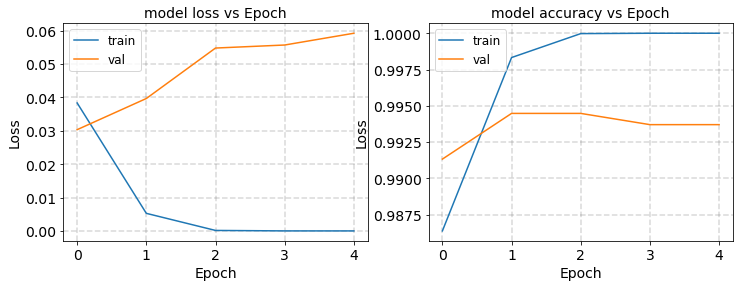

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0851 - accuracy: 0.9769 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 5s - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0702 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 5s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0773 - val_accuracy: 0.9825
Epoch 4/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1041 - val_accuracy: 0.9849
Epoch 5/5
1250/1250 - 5s - loss: 7.4830e-05 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9857


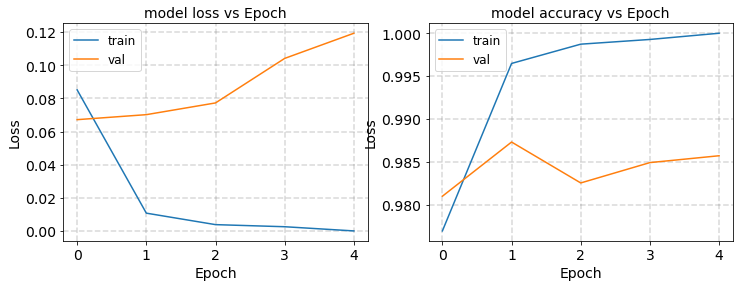

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0743 - accuracy: 0.9845 - val_loss: 0.0700 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 5s - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0541 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0659 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 6s - loss: 2.4746e-05 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 7s - loss: 8.0532e-06 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9913


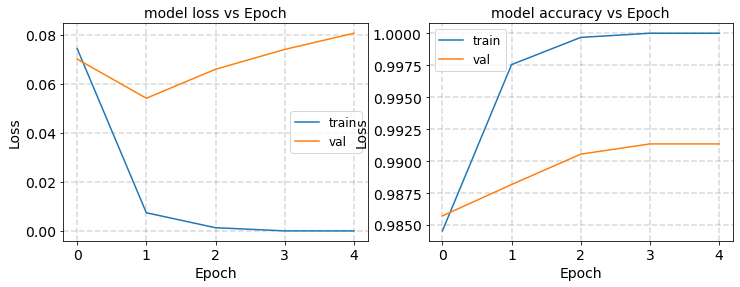

8
Epoch 1/5
1250/1250 - 8s - loss: 0.1203 - accuracy: 0.9686 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 6s - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0451 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0553 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 7s - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0712 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 7s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0703 - val_accuracy: 0.9850


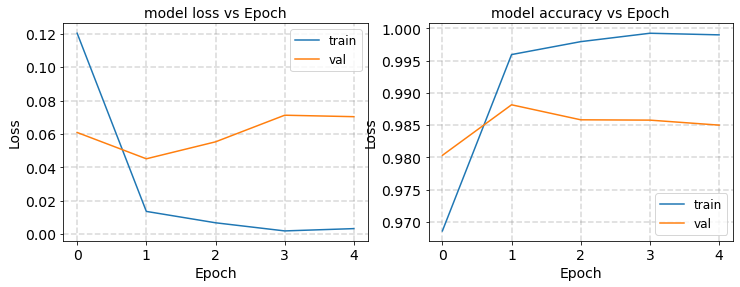

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 7s - loss: 0.0539 - accuracy: 0.9884 - val_loss: 0.0918 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 7s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1131 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 6s - loss: 5.6115e-05 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 6s - loss: 1.1641e-05 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 7s - loss: 3.9553e-06 - accuracy: 1.0000 - val_loss: 0.1866 - val_accuracy: 0.9881


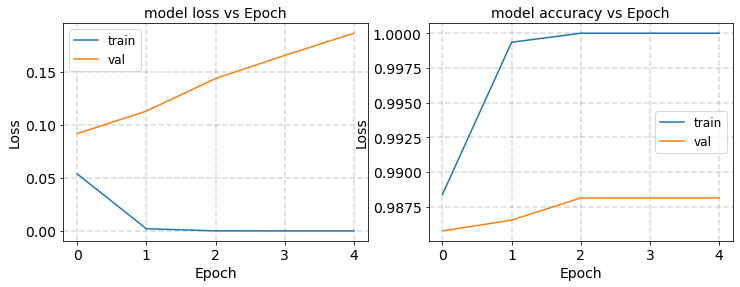

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0777 - accuracy: 0.9870 - val_loss: 0.0692 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 6s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0834 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 7s - loss: 4.3449e-05 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 5s - loss: 1.3129e-05 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 5s - loss: 3.9061e-06 - accuracy: 1.0000 - val_loss: 0.1274 - val_accuracy: 0.9857


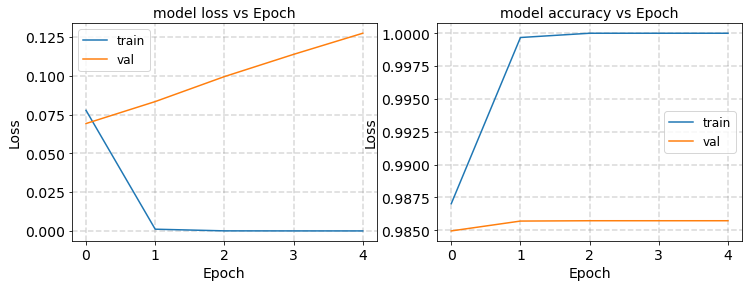

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1133 - accuracy: 0.9773 - val_loss: 0.0632 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0672 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1124 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0951 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 1.8674e-04 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9842


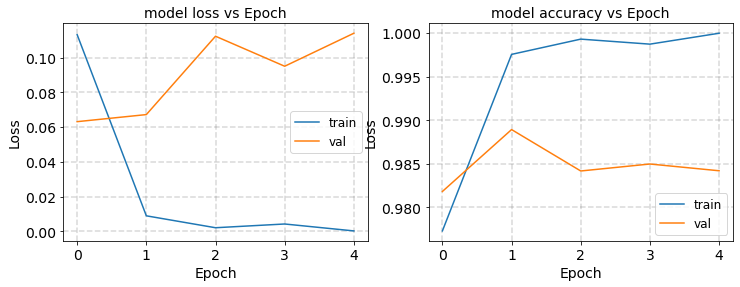

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0997 - accuracy: 0.9788 - val_loss: 0.0473 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 5s - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0603 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 7.2810e-04 - accuracy: 0.9999 - val_loss: 0.0594 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0683 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0812 - val_accuracy: 0.9929


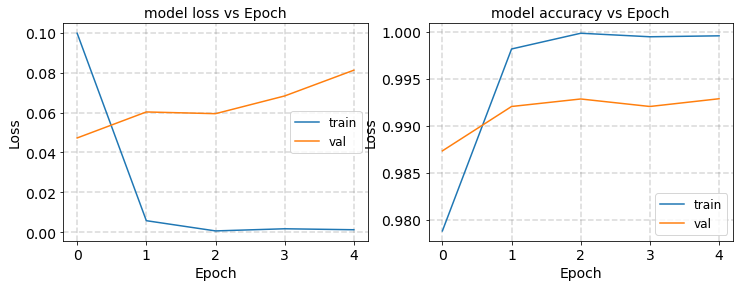

round2 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 4s - loss: 3.8157e-05 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 4s - loss: 1.5168e-05 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 6.3768e-06 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 1.7932e-06 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 3.3323e-07 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9929


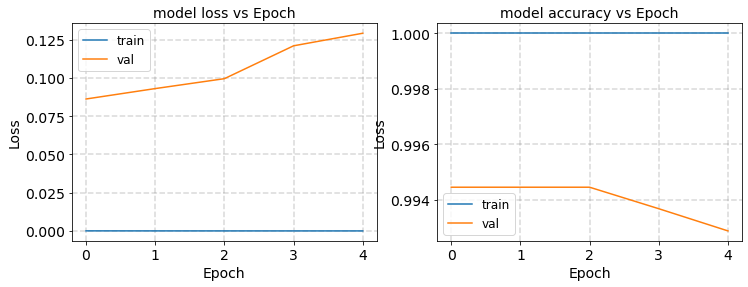

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1252 - accuracy: 0.9876 - val_loss: 0.0639 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.1006 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0948 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 1.9578e-04 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 2.5156e-05 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9842


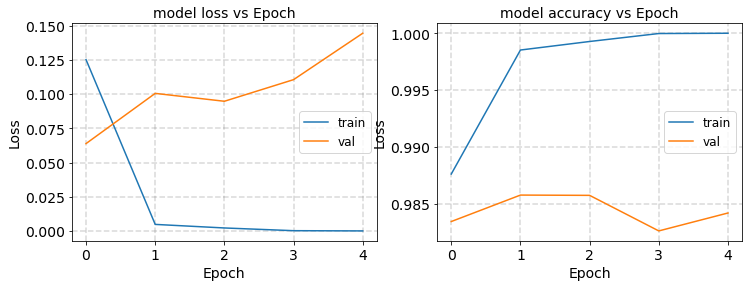

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0888 - accuracy: 0.9811 - val_loss: 0.0504 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0634 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 2.1537e-04 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 4.5087e-05 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 1.4152e-05 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9897


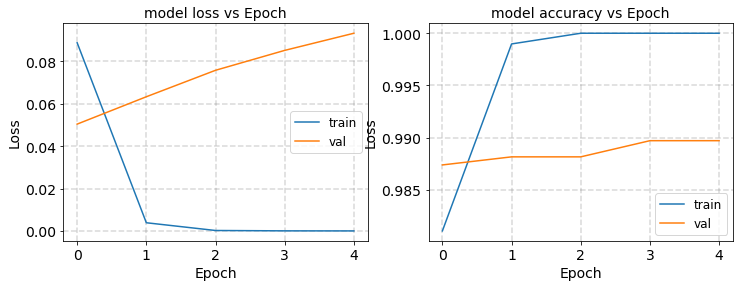

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1206 - accuracy: 0.9769 - val_loss: 0.0778 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.1183 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1350 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1474 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 2.4316e-04 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9850


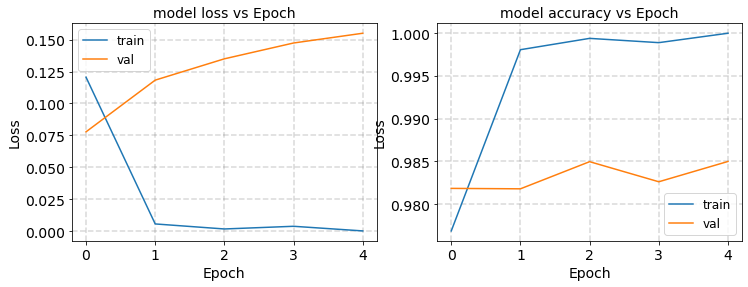

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 128)               32898     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

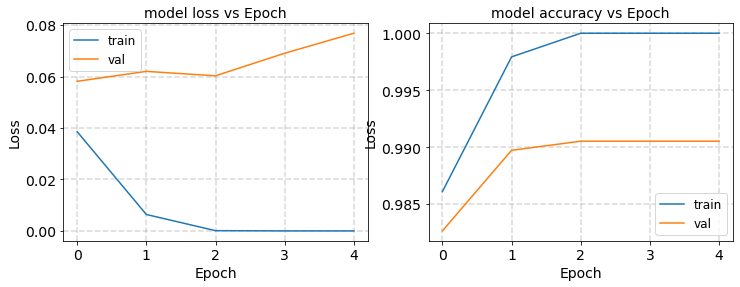

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0824 - accuracy: 0.9821 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0618 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0671 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0799 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 1.4084e-04 - accuracy: 0.9999 - val_loss: 0.1064 - val_accuracy: 0.9881


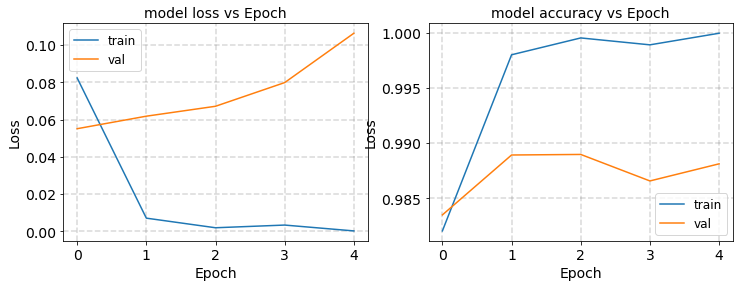

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0883 - accuracy: 0.9759 - val_loss: 0.0459 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0676 - val_accuracy: 0.9857
Epoch 3/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.0460 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 4.0184e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9898


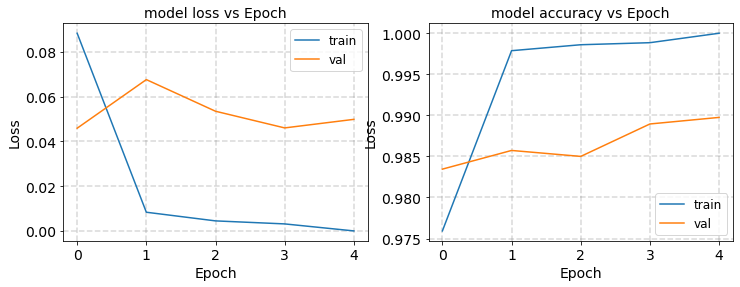

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1063 - accuracy: 0.9752 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 2/5
1250/1250 - 4s - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0846 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1043 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 3.2082e-05 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 1.0228e-05 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9858


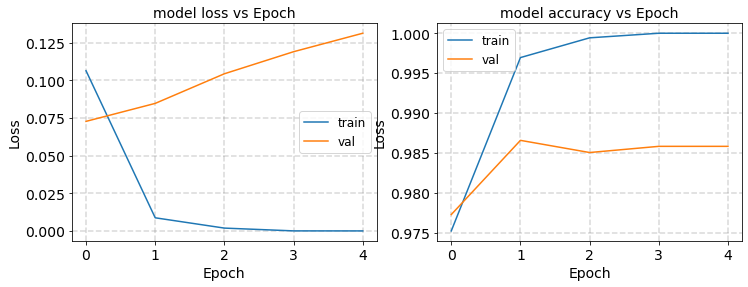

round1 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 4.0803e-06 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 1.6583e-06 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 7.5758e-07 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 3.5814e-07 - accuracy: 1.0000 - val_loss: 0.1722 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 4s - loss: 1.6490e-07 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 0.9851


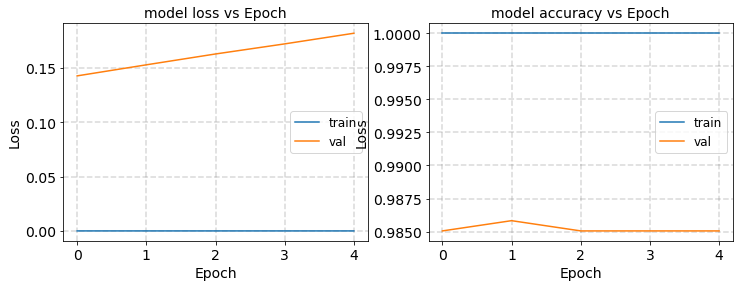

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0882 - accuracy: 0.9864 - val_loss: 0.0851 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0747 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 6s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1006 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 6s - loss: 2.1996e-04 - accuracy: 0.9999 - val_loss: 0.1362 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 6s - loss: 2.5489e-05 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9882


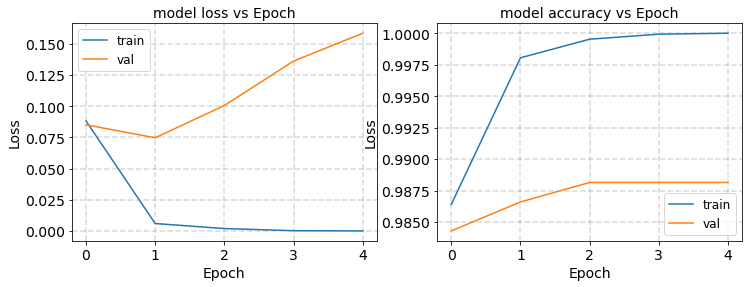

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1029 - accuracy: 0.9725 - val_loss: 0.0569 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0896 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1014 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1009 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 1.1605e-04 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9834


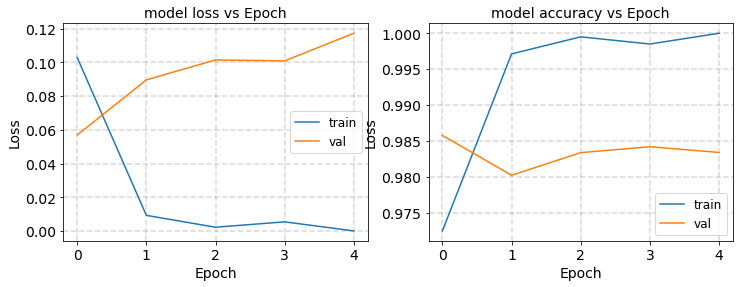

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0945 - accuracy: 0.9840 - val_loss: 0.0655 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0873 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1101 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 5s - loss: 4.5797e-05 - accuracy: 1.0000 - val_loss: 0.1385 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 9.0978e-06 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9874


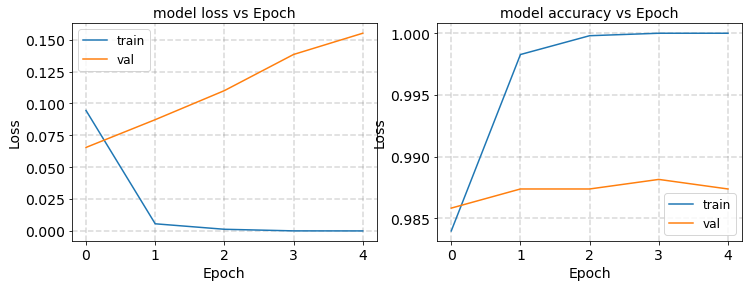

round2 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.1282 - accuracy: 0.9807 - val_loss: 0.0576 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 6s - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0840 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 6s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1136 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 4s - loss: 7.4046e-05 - accuracy: 1.0000 - val_loss: 0.1249 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 5s - loss: 2.2855e-05 - accuracy: 1.0000 - val_loss: 0.1383 - val_accuracy: 0.9826


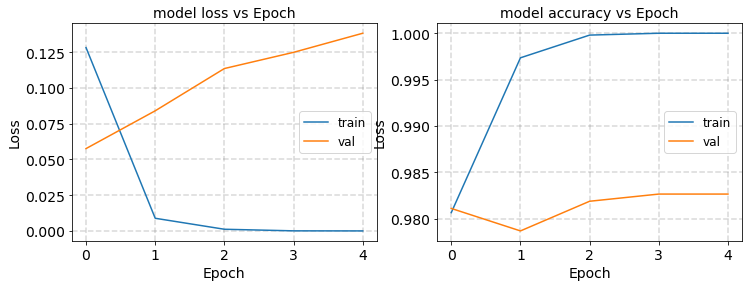

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0622 - accuracy: 0.9916 - val_loss: 0.0597 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 5s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0692 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 6s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0774 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 6s - loss: 6.0217e-05 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 6s - loss: 1.6227e-05 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9905


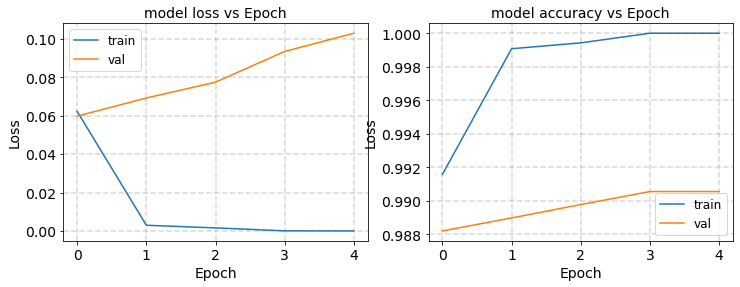

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0804 - accuracy: 0.9857 - val_loss: 0.0744 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 6s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1123 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 6s - loss: 9.9268e-05 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 6s - loss: 2.8277e-05 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 6s - loss: 1.1426e-05 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9842


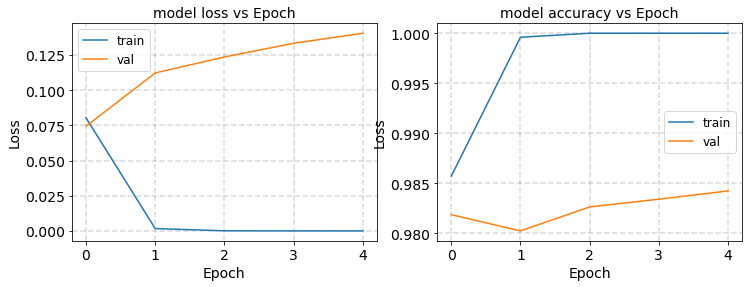

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0889 - accuracy: 0.9884 - val_loss: 0.0461 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 6s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0661 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0733 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 6s - loss: 1.8091e-04 - accuracy: 0.9999 - val_loss: 0.0836 - val_accuracy: 0.9912
Epoch 5/5
1250/1250 - 5s - loss: 1.6216e-05 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9912


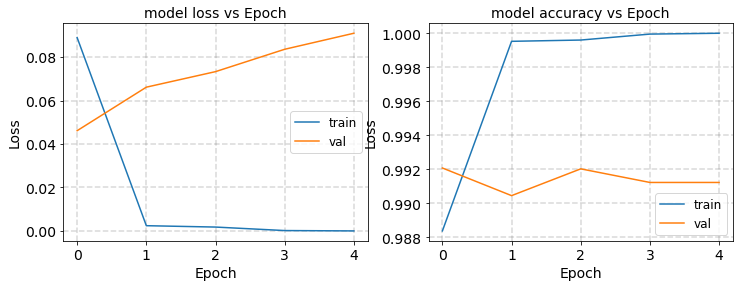

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 128)               32898     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

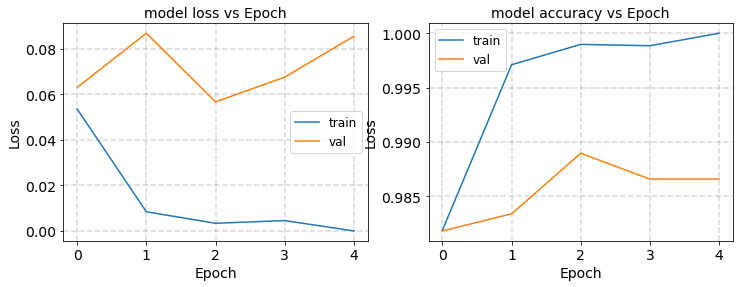

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0651 - accuracy: 0.9853 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0440 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 3.6347e-04 - accuracy: 0.9999 - val_loss: 0.0578 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.7271e-05 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 4.7261e-06 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9913


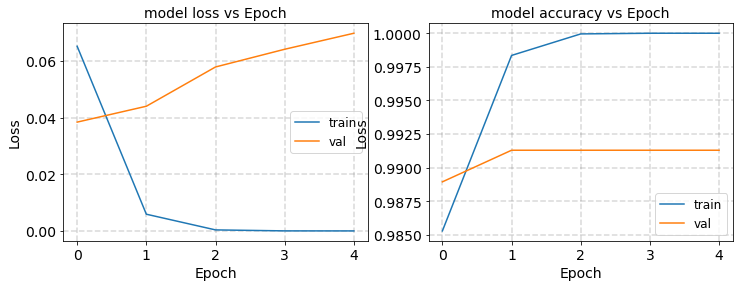

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0706 - accuracy: 0.9873 - val_loss: 0.0503 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0606 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0682 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 6.0085e-05 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 5.4813e-06 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9897


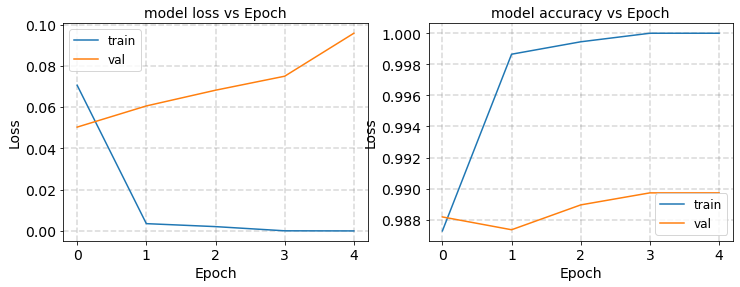

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0844 - accuracy: 0.9820 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0680 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 1.9071e-04 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 2.2070e-05 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 8.1113e-06 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 0.9850


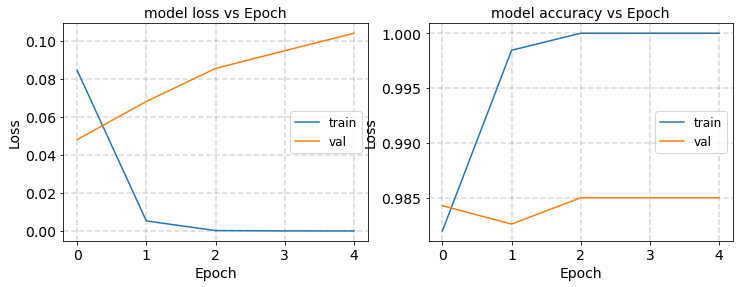

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 5s - loss: 3.0269e-06 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 1.1821e-06 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 5.2917e-07 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 2.2935e-07 - accuracy: 1.0000 - val_loss: 0.1340 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 1.0426e-07 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9858


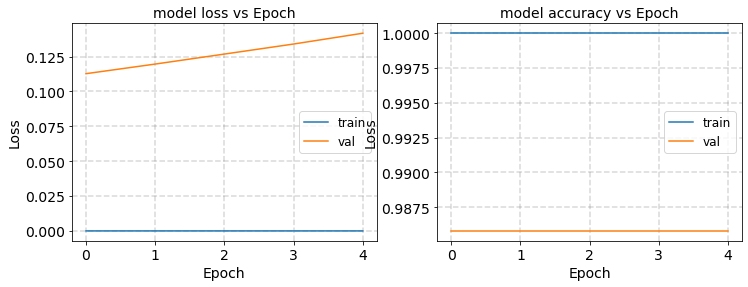

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0901 - accuracy: 0.9843 - val_loss: 0.0724 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0841 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 1.2311e-04 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 1.8176e-05 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 6.4471e-06 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9850


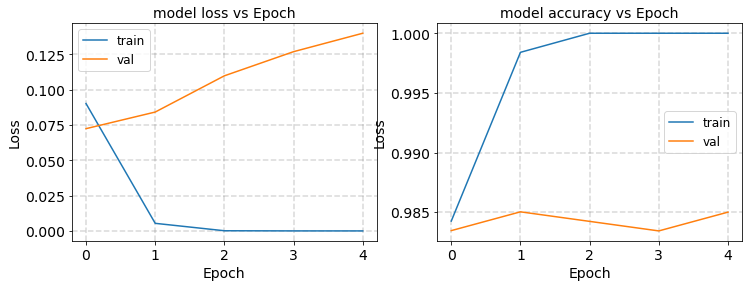

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0709 - accuracy: 0.9876 - val_loss: 0.0438 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0570 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0822 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 4.1536e-05 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 5s - loss: 7.3600e-06 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9873


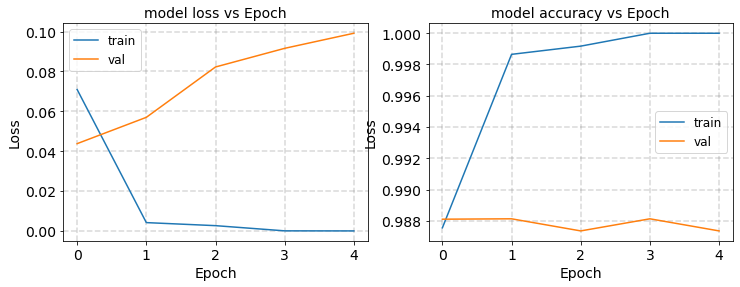

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1067 - accuracy: 0.9825 - val_loss: 0.0380 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0799 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 5s - loss: 1.1304e-04 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 1.8163e-05 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 5s - loss: 6.8235e-06 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 0.9898


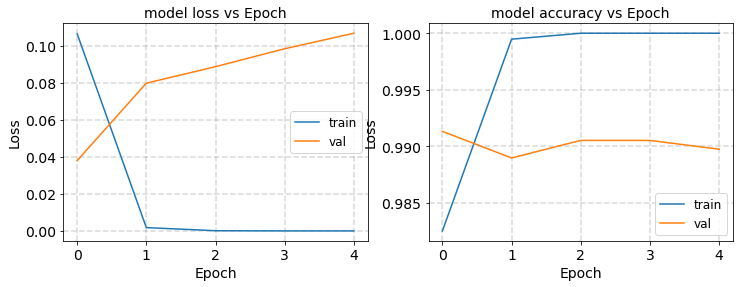

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.1186 - accuracy: 0.9731 - val_loss: 0.0788 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 5s - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0762 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 5s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1108 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1200 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 3.3107e-05 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9842


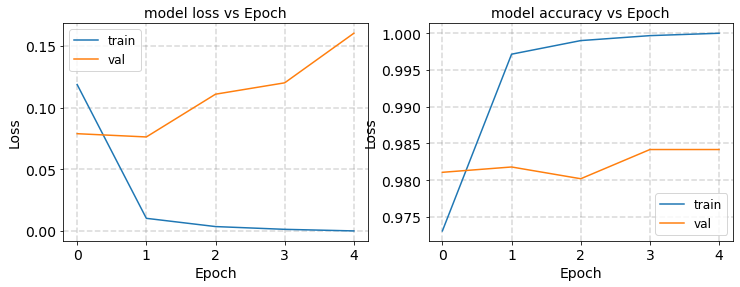

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0910 - accuracy: 0.9826 - val_loss: 0.0777 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1300 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1147 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 5s - loss: 1.9724e-04 - accuracy: 0.9999 - val_loss: 0.1398 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 5s - loss: 1.8815e-05 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9937


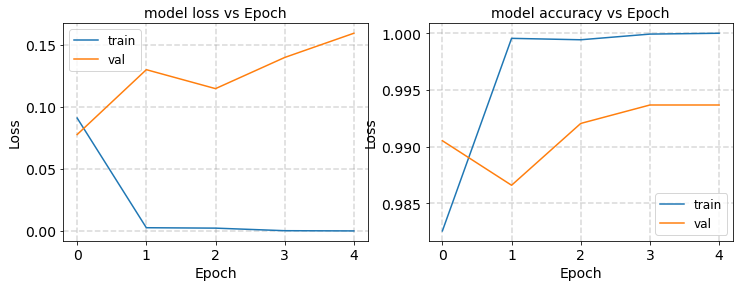

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1107 - accuracy: 0.9832 - val_loss: 0.0561 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 5s - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0714 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 5s - loss: 1.7138e-04 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 5s - loss: 3.8936e-05 - accuracy: 1.0000 - val_loss: 0.0897 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 1.4709e-05 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9905


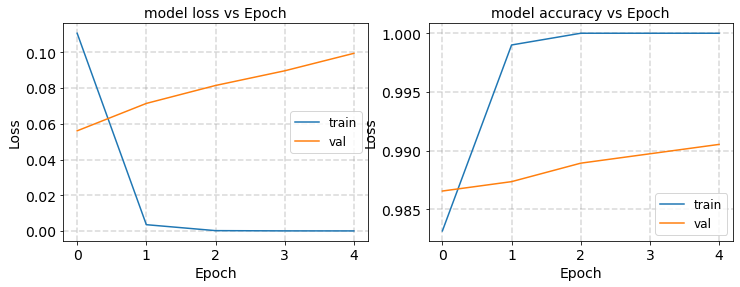

8
Epoch 1/5
1250/1250 - 6s - loss: 0.1064 - accuracy: 0.9745 - val_loss: 0.0640 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 6s - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0730 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 6s - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0903 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 6s - loss: 2.6421e-04 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 6s - loss: 3.9005e-05 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9803


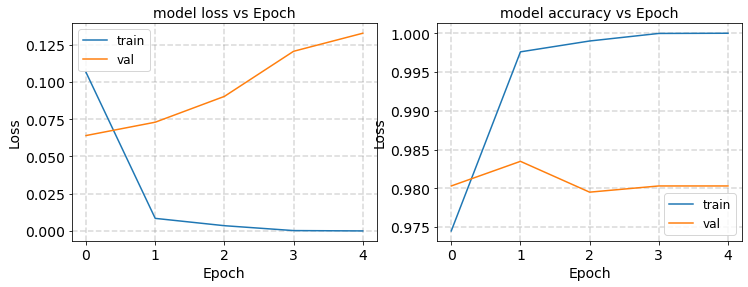

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 128)               32898     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

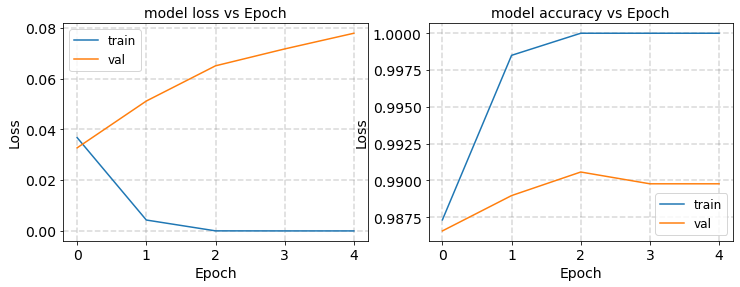

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0838 - accuracy: 0.9836 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0432 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0486 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 1.0080e-04 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.3145e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9912


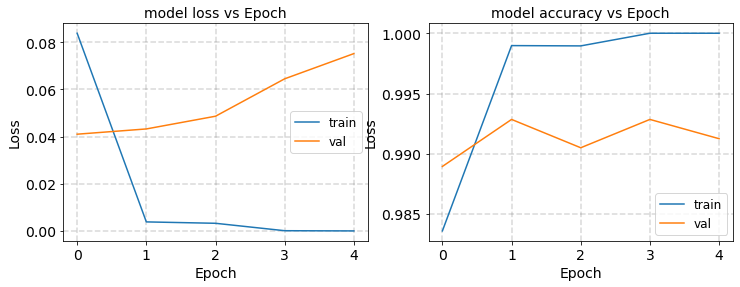

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1105 - accuracy: 0.9726 - val_loss: 0.0735 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0732 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.1216 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.1105 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1361 - val_accuracy: 0.9803


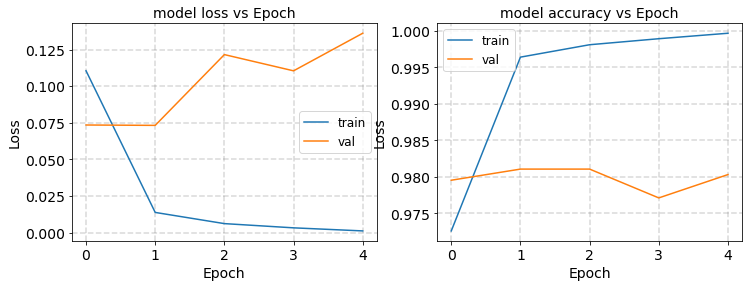

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0916 - accuracy: 0.9789 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0800 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0727 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0809 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 4s - loss: 3.3493e-05 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9851


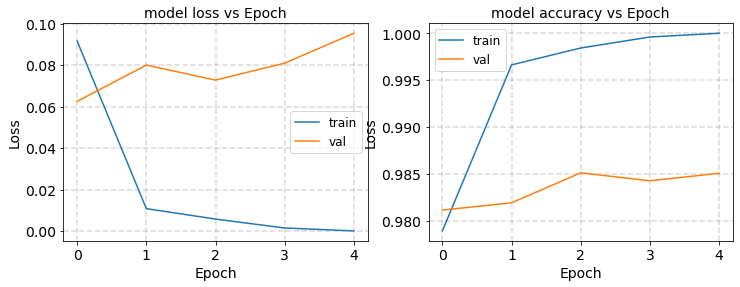

round1 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0738 - accuracy: 0.9869 - val_loss: 0.0595 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0618 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0665 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 2.0465e-04 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 2.5516e-05 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9898


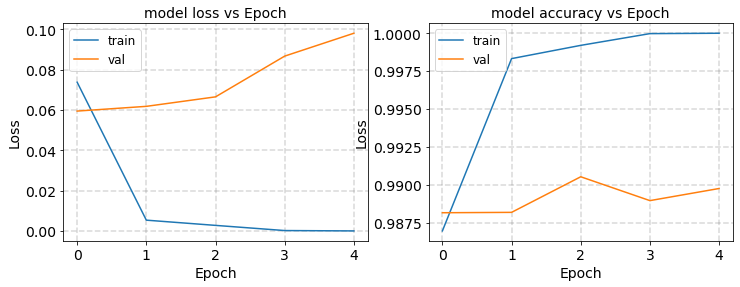

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1161 - accuracy: 0.9779 - val_loss: 0.0609 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0757 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0890 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 5s - loss: 1.1019e-04 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 2.4423e-05 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9842


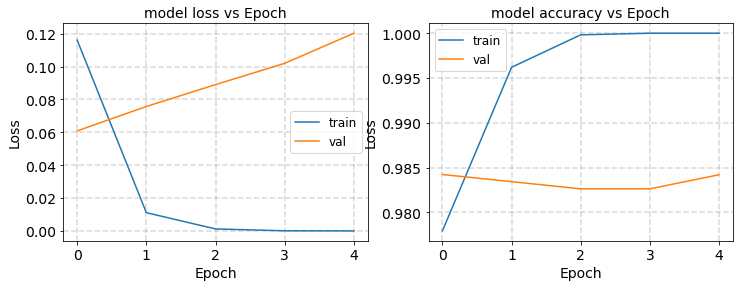

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0806 - accuracy: 0.9892 - val_loss: 0.0668 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0599 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 6.6140e-04 - accuracy: 0.9998 - val_loss: 0.0731 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 3.1345e-05 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 9.7505e-06 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9913


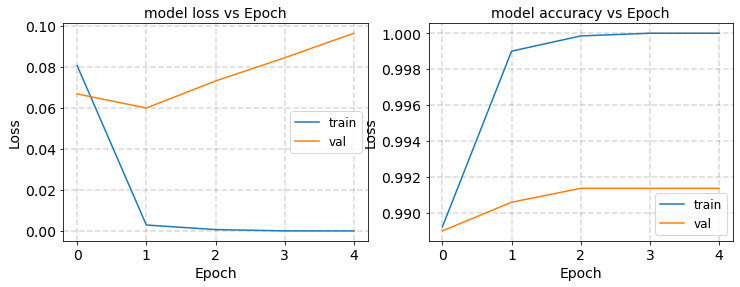

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1144 - accuracy: 0.9743 - val_loss: 0.0565 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 6s - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.1028 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0834 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 6s - loss: 7.8287e-05 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 6s - loss: 2.0261e-05 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9834


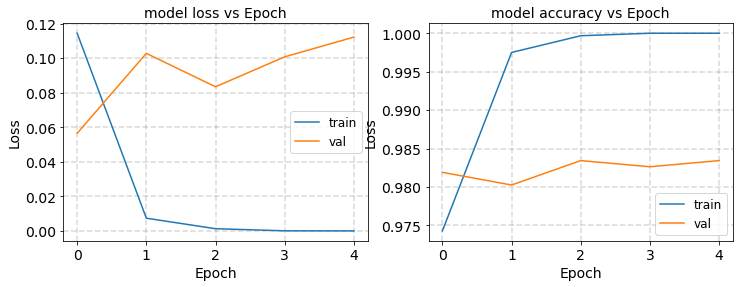

round2 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0854 - accuracy: 0.9880 - val_loss: 0.0330 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0330 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 5s - loss: 8.1273e-04 - accuracy: 0.9997 - val_loss: 0.0404 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 2.7766e-05 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 5s - loss: 1.0005e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9929


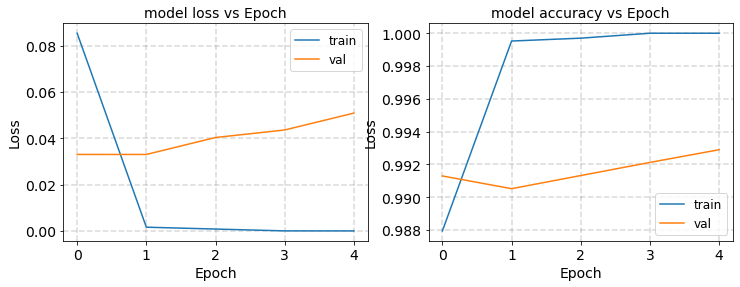

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1093 - accuracy: 0.9787 - val_loss: 0.0715 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 5s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1126 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 5s - loss: 2.1719e-04 - accuracy: 1.0000 - val_loss: 0.1279 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 5s - loss: 3.7002e-05 - accuracy: 1.0000 - val_loss: 0.1422 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 5s - loss: 1.1358e-05 - accuracy: 1.0000 - val_loss: 0.1564 - val_accuracy: 0.9858


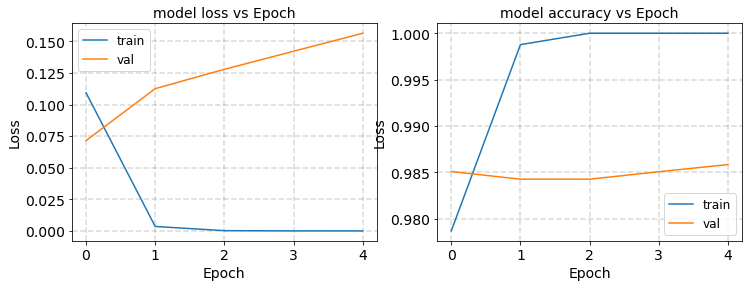

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0951 - accuracy: 0.9836 - val_loss: 0.0860 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 5s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.1184 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 5s - loss: 3.7796e-04 - accuracy: 1.0000 - val_loss: 0.1569 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 5s - loss: 4.3698e-05 - accuracy: 1.0000 - val_loss: 0.1871 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.1197e-05 - accuracy: 1.0000 - val_loss: 0.2080 - val_accuracy: 0.9818


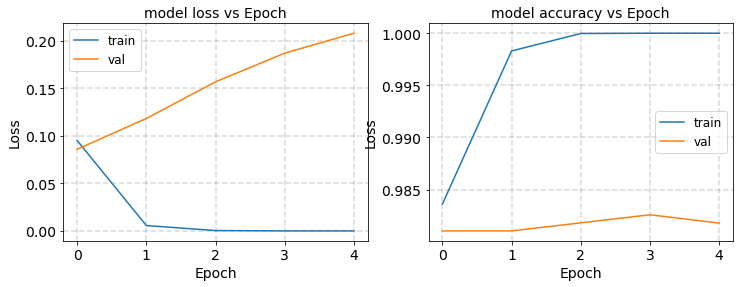

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1137 - accuracy: 0.9833 - val_loss: 0.0517 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 5s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0650 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0717 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0731 - val_accuracy: 0.9874


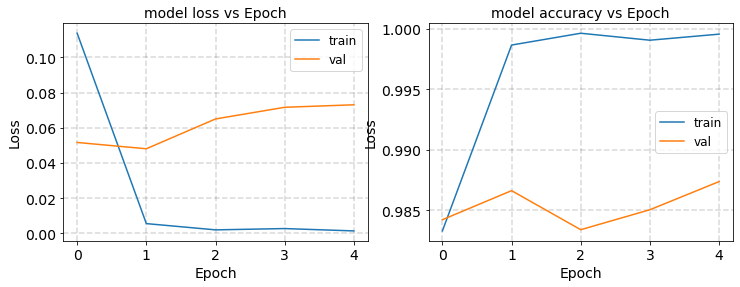

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 128)               32898     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

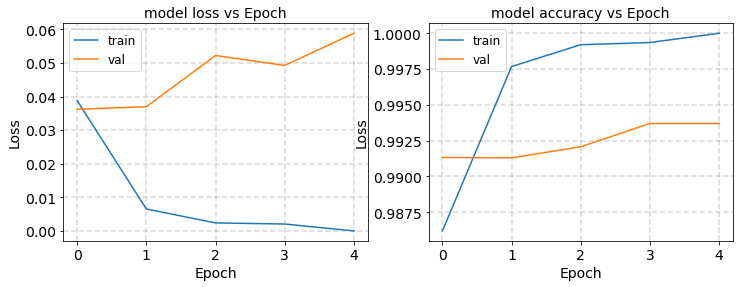

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0849 - accuracy: 0.9772 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 5s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0677 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0557 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 1.9980e-04 - accuracy: 0.9999 - val_loss: 0.0782 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 5s - loss: 2.1224e-05 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9874


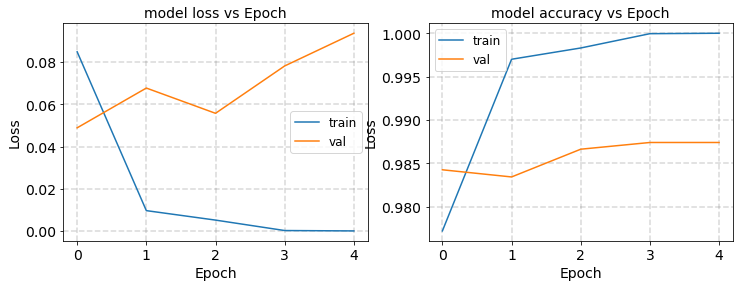

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0580 - accuracy: 0.9879 - val_loss: 0.0324 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0361 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 7.9024e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.3283e-05 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 4.6071e-06 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9905


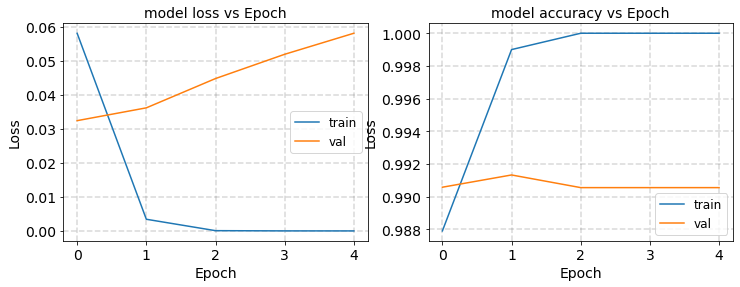

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0900 - accuracy: 0.9801 - val_loss: 0.0638 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0746 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0626 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 5.4419e-05 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 1.3505e-05 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9866


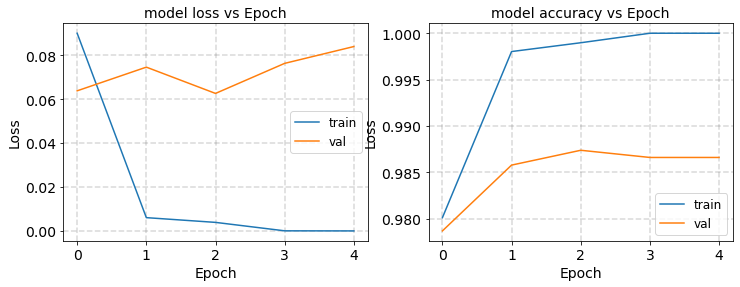

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0675 - accuracy: 0.9890 - val_loss: 0.0422 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0531 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.3819e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 2.6942e-05 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 7.2318e-06 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9913


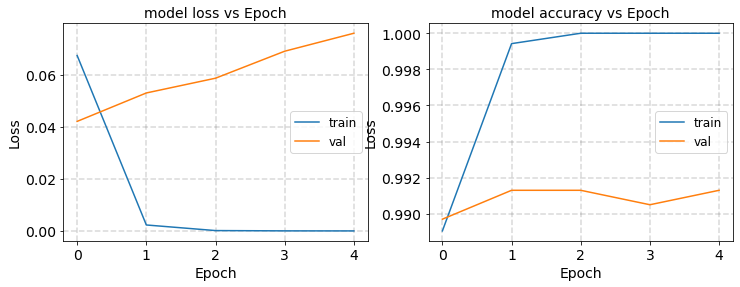

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0849 - accuracy: 0.9828 - val_loss: 0.0464 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0493 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 5.7801e-04 - accuracy: 0.9998 - val_loss: 0.0838 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0578 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 2.7869e-05 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9905


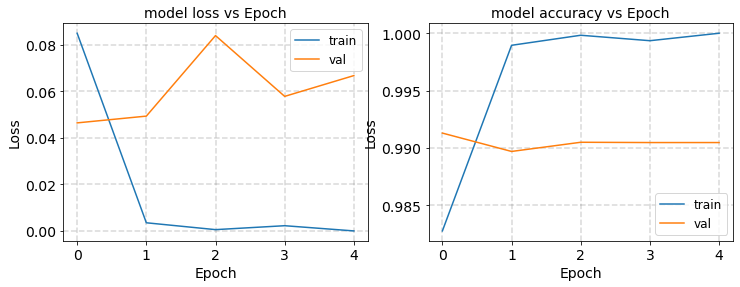

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0929 - accuracy: 0.9803 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0811 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1027 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1142 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 8.3784e-05 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9850


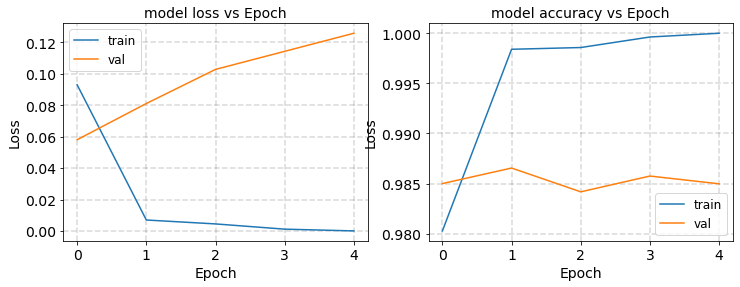

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0757 - accuracy: 0.9848 - val_loss: 0.0520 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0671 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0877 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 3.0440e-04 - accuracy: 0.9999 - val_loss: 0.0956 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 4.6902e-05 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9842


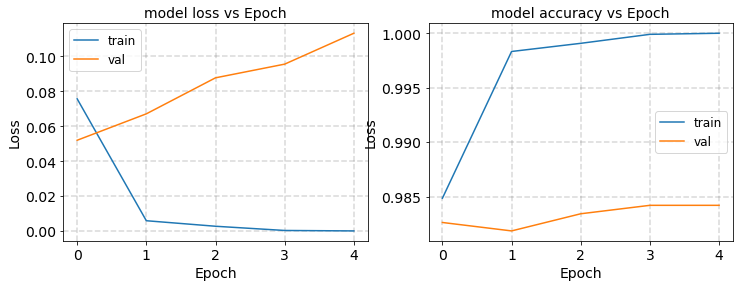

round2 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0585 - accuracy: 0.9891 - val_loss: 0.0614 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 4.3650e-04 - accuracy: 0.9999 - val_loss: 0.0636 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 2.6719e-05 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 4.6446e-06 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 1.6008e-06 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9882


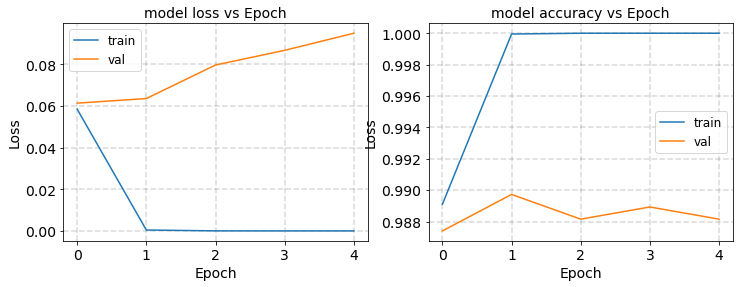

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1024 - accuracy: 0.9842 - val_loss: 0.0773 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.1009 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1199 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 3.7572e-05 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9841
Epoch 5/5
1250/1250 - 4s - loss: 1.0850e-05 - accuracy: 1.0000 - val_loss: 0.1628 - val_accuracy: 0.9833


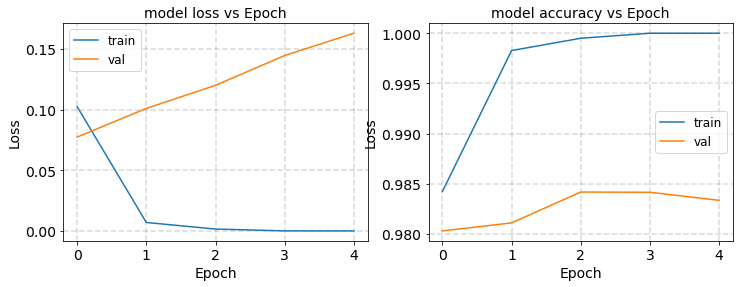

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1057 - accuracy: 0.9838 - val_loss: 0.0582 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0910 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0980 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 4s - loss: 9.1378e-05 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 2.1283e-05 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9897


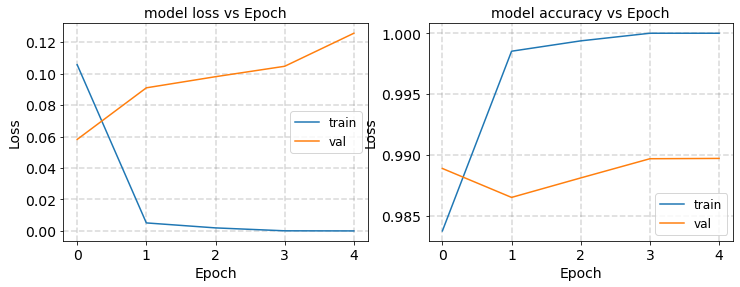

8
Epoch 1/5
1250/1250 - 6s - loss: 0.0912 - accuracy: 0.9824 - val_loss: 0.0677 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 6s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0925 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 6s - loss: 8.6971e-04 - accuracy: 0.9999 - val_loss: 0.0992 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 6s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.1462 - val_accuracy: 0.9683
Epoch 5/5
1250/1250 - 5s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0979 - val_accuracy: 0.9858


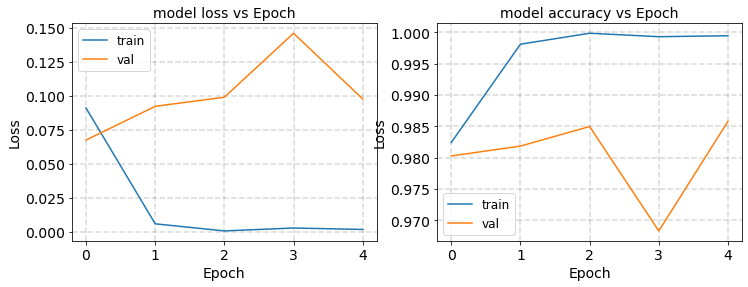

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 128)               32898     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

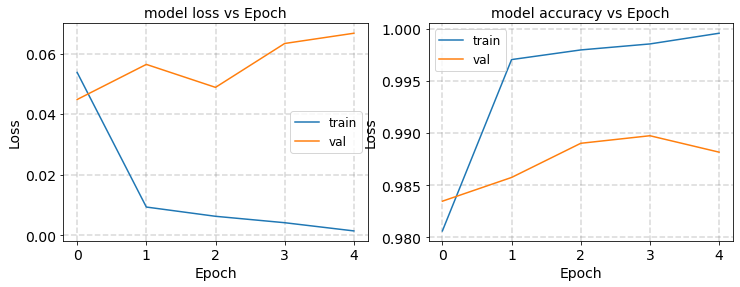

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0565 - accuracy: 0.9868 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0320 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.0319e-04 - accuracy: 0.9999 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 6.0061e-06 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.3983e-06 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9929


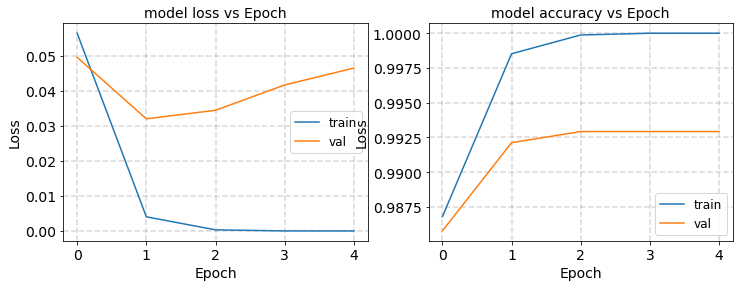

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0833 - accuracy: 0.9834 - val_loss: 0.0611 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0659 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0791 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 2.6145e-05 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 3.5903e-06 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9874


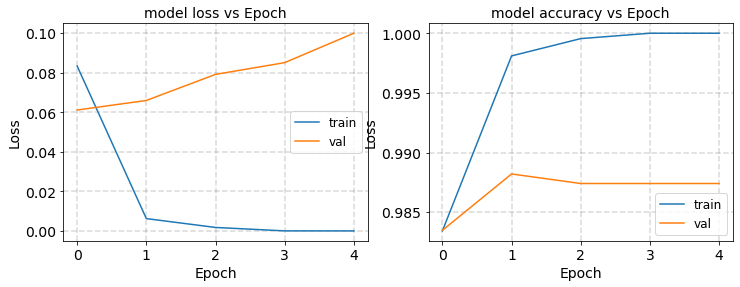

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0793 - accuracy: 0.9844 - val_loss: 0.0265 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0411 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 1.5401e-04 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9961
Epoch 4/5
1250/1250 - 4s - loss: 2.7928e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9961
Epoch 5/5
1250/1250 - 5s - loss: 9.9333e-06 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9961


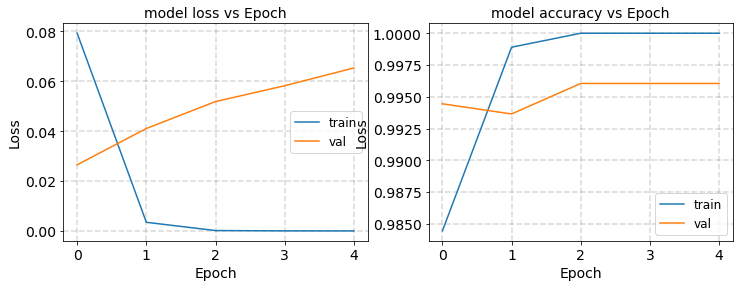

round1 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.0852 - accuracy: 0.9845 - val_loss: 0.0415 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0787 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 7.1180e-05 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9849
Epoch 4/5
1250/1250 - 4s - loss: 1.1418e-05 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 3.7868e-06 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9857


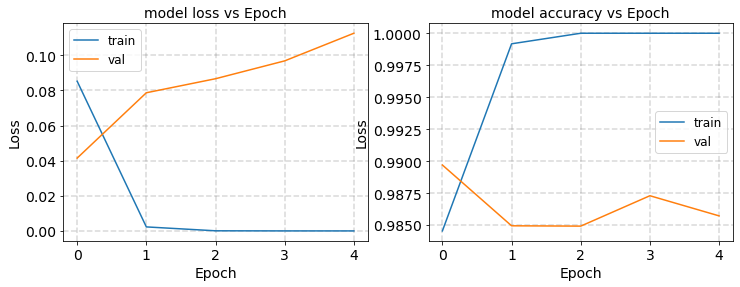

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0775 - accuracy: 0.9863 - val_loss: 0.0526 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0770 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 2.0901e-04 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 3.1748e-05 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 1.1773e-05 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9913


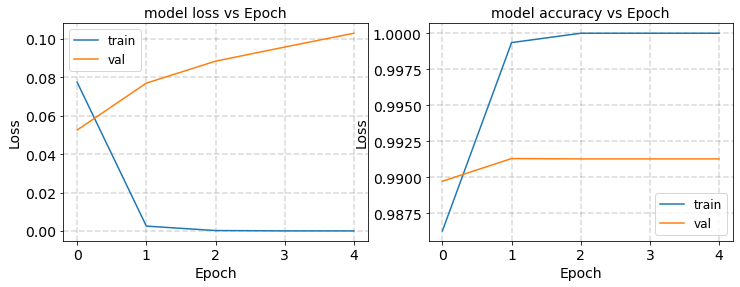

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0700 - accuracy: 0.9851 - val_loss: 0.0526 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9990 - val_loss: 0.0862 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 8.8013e-05 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 1.9392e-05 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 7.6177e-06 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9873


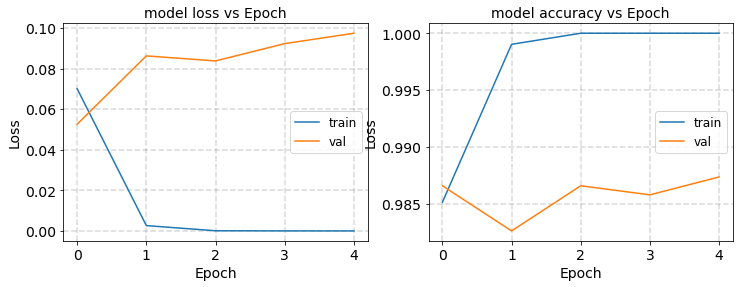

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0660 - accuracy: 0.9886 - val_loss: 0.0552 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1036 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 6.3658e-05 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 5.1153e-06 - accuracy: 1.0000 - val_loss: 0.1247 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 1.3222e-06 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9882


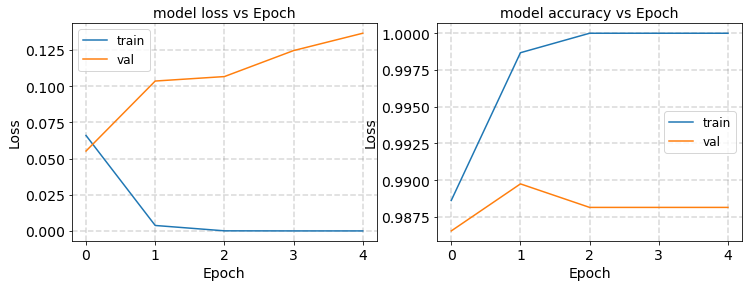

round2 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 0.1337 - accuracy: 0.9778 - val_loss: 0.0748 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0798 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0865 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0956 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1088 - val_accuracy: 0.9850


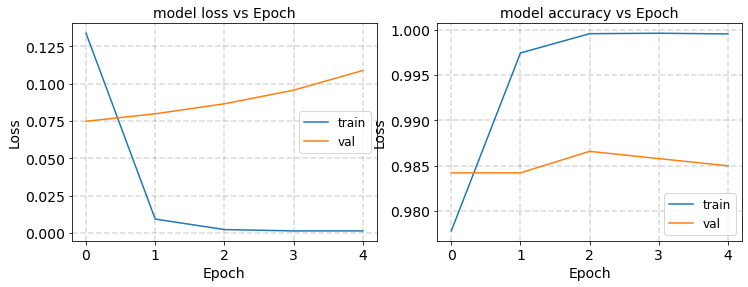

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0658 - accuracy: 0.9868 - val_loss: 0.0365 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 4.0516e-04 - accuracy: 0.9999 - val_loss: 0.0471 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 2.3582e-05 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 6.0410e-06 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9929


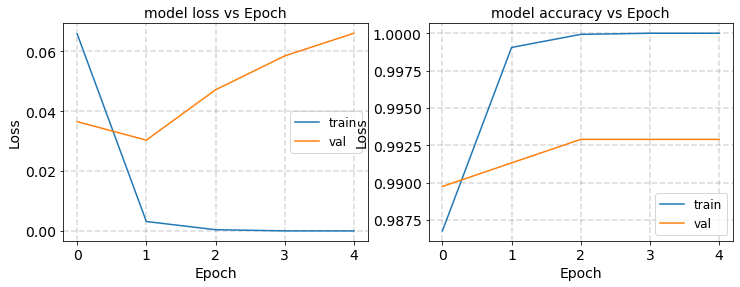

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1161 - accuracy: 0.9848 - val_loss: 0.0455 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 5.5293e-04 - accuracy: 0.9999 - val_loss: 0.0630 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 4.0147e-05 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.4219e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 4.1539e-06 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9921


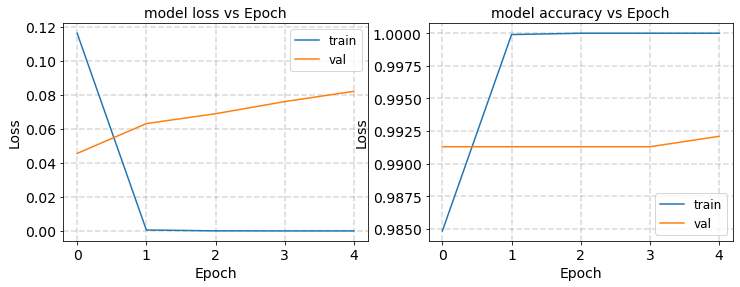

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1013 - accuracy: 0.9790 - val_loss: 0.0640 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0833 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 9.8461e-04 - accuracy: 0.9998 - val_loss: 0.1001 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 9.4677e-05 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 2.7455e-05 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9842


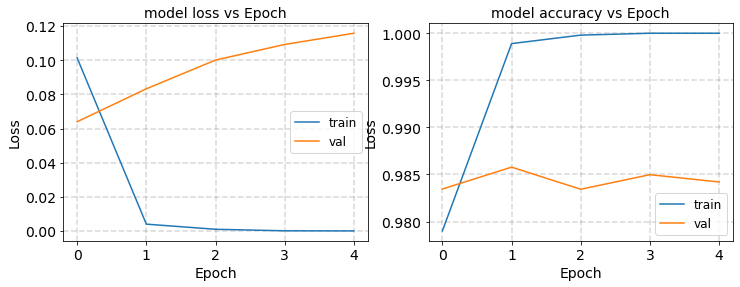

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 128)               32898     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

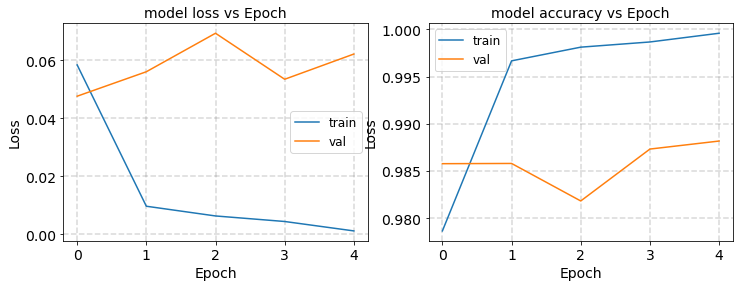

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0650 - accuracy: 0.9848 - val_loss: 0.0325 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0375 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 2.2376e-04 - accuracy: 0.9999 - val_loss: 0.0468 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 1.0040e-05 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 3.7031e-06 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9921


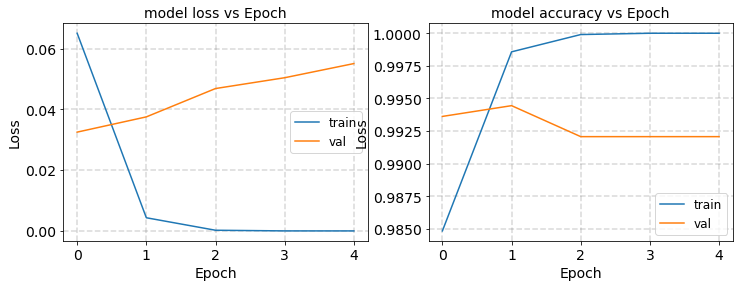

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0783 - accuracy: 0.9839 - val_loss: 0.0574 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0686 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0505 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0679 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.6979e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9890


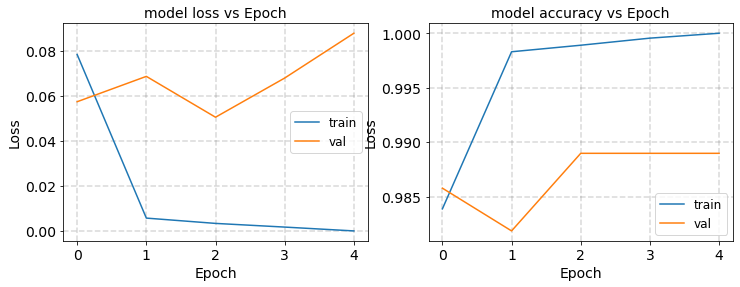

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0591 - accuracy: 0.9887 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0753 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0703 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 2.1656e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 4s - loss: 7.0553e-06 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9881


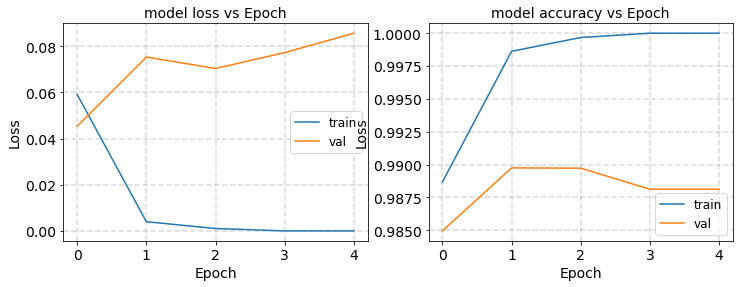

round1 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.0773 - accuracy: 0.9824 - val_loss: 0.0503 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0535 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0681 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 5.2983e-04 - accuracy: 0.9999 - val_loss: 0.0762 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 2.3193e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9865


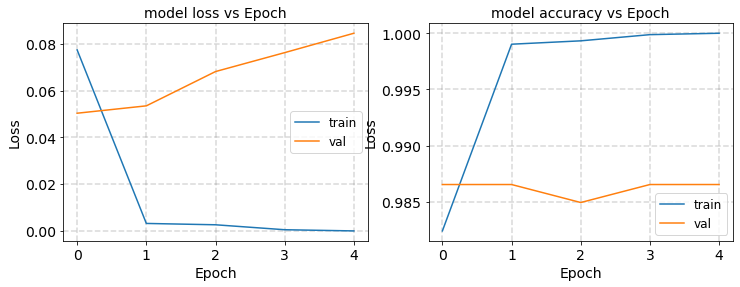

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0656 - accuracy: 0.9879 - val_loss: 0.0329 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0409 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 3.0566e-04 - accuracy: 0.9999 - val_loss: 0.0516 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 5s - loss: 9.8249e-06 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 5s - loss: 2.9448e-06 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9937


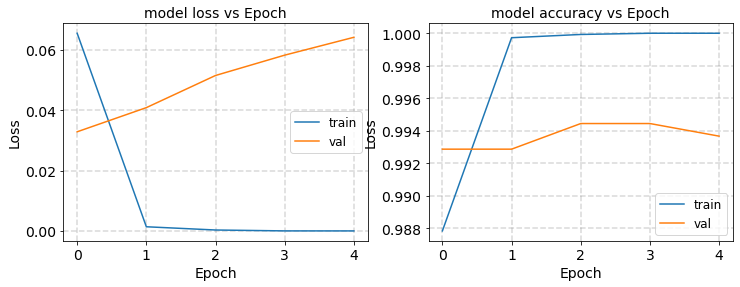

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0858 - accuracy: 0.9875 - val_loss: 0.0524 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 7.5936e-04 - accuracy: 0.9999 - val_loss: 0.0913 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 5s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0690 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0818 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 5s - loss: 1.3337e-05 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9889


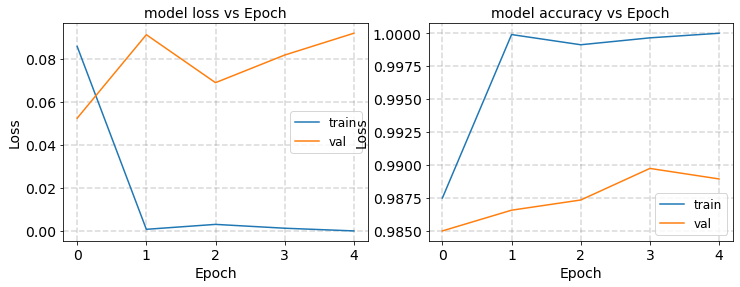

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0620 - accuracy: 0.9906 - val_loss: 0.0574 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 5s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0826 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 3.8112e-05 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 5.9628e-06 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 1.0883e-06 - accuracy: 1.0000 - val_loss: 0.1495 - val_accuracy: 0.9882


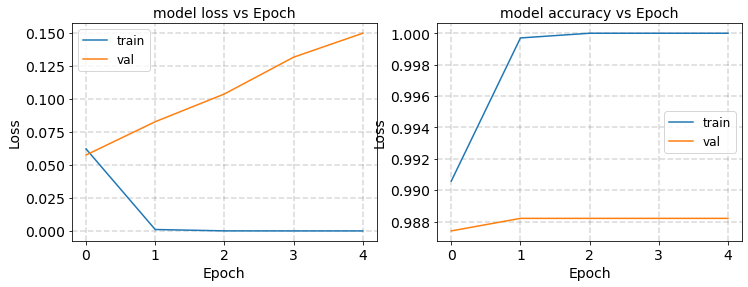

round2 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 5s - loss: 0.0851 - accuracy: 0.9881 - val_loss: 0.0689 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0967 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 5s - loss: 4.8956e-05 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 4s - loss: 1.5035e-05 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 5s - loss: 6.0458e-06 - accuracy: 1.0000 - val_loss: 0.1355 - val_accuracy: 0.9826


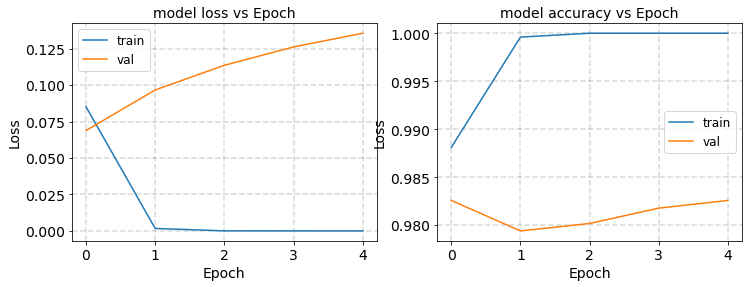

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0658 - accuracy: 0.9883 - val_loss: 0.0481 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0867 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 3.9745e-05 - accuracy: 1.0000 - val_loss: 0.1220 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 5s - loss: 6.3044e-06 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 5s - loss: 1.9364e-06 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 0.9906


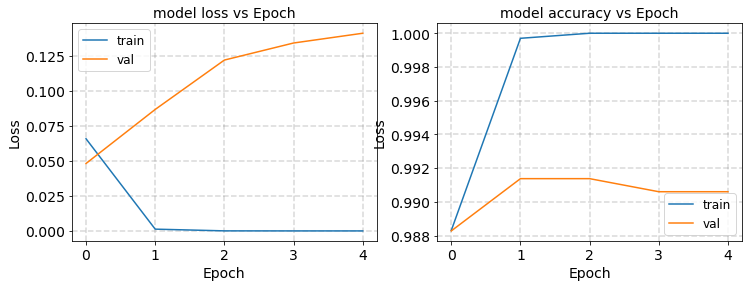

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0918 - accuracy: 0.9883 - val_loss: 0.0667 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 5s - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0831 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 5s - loss: 2.7664e-04 - accuracy: 0.9999 - val_loss: 0.0954 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0869 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 5s - loss: 5.3894e-05 - accuracy: 1.0000 - val_loss: 0.1108 - val_accuracy: 0.9889


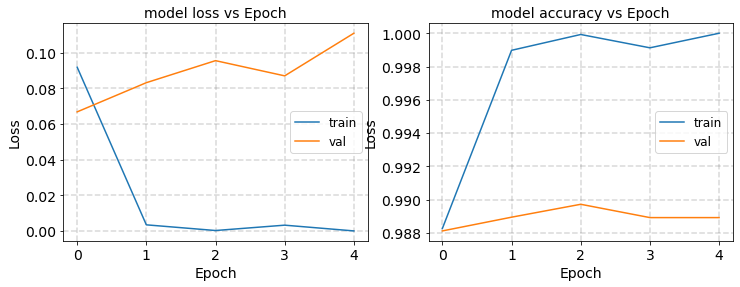

2
Epoch 1/5
1250/1250 - 5s - loss: 0.0840 - accuracy: 0.9858 - val_loss: 0.0503 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0864 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 4.0294e-05 - accuracy: 1.0000 - val_loss: 0.0964 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 8.8751e-06 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 2.9203e-06 - accuracy: 1.0000 - val_loss: 0.1230 - val_accuracy: 0.9921


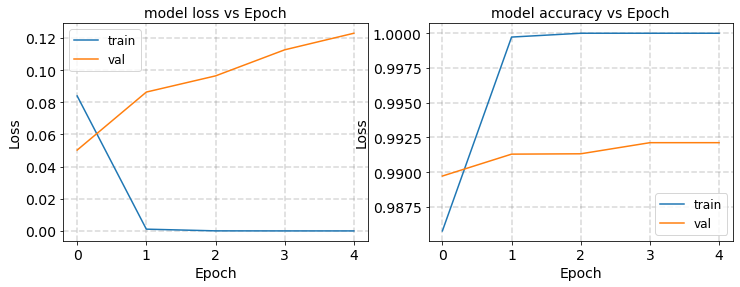

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 128)               32898     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

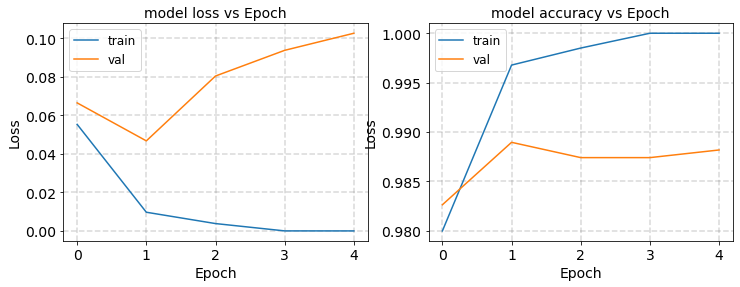

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0860 - accuracy: 0.9796 - val_loss: 0.0589 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 3s - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0879 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0913 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 1.4172e-05 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 2.2717e-06 - accuracy: 1.0000 - val_loss: 0.1241 - val_accuracy: 0.9882


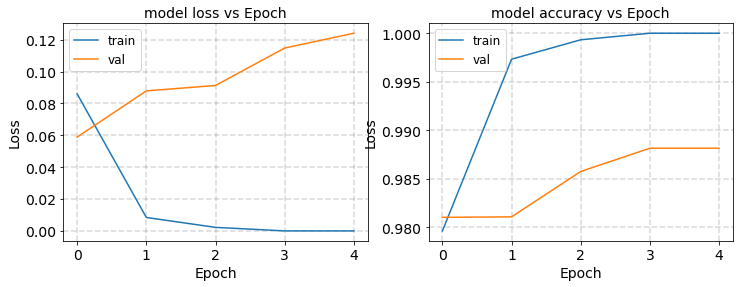

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0656 - accuracy: 0.9888 - val_loss: 0.0515 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0654 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 1.5650e-04 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 5.7630e-06 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.7025e-06 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9913


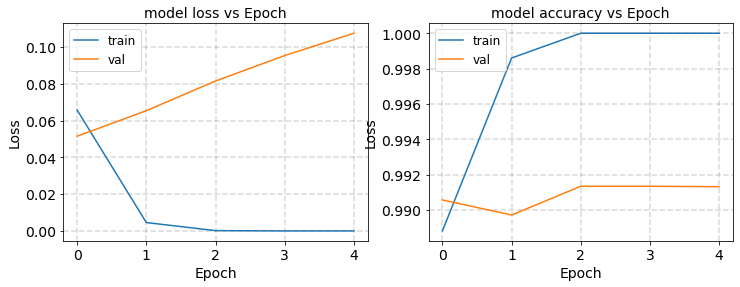

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1008 - accuracy: 0.9851 - val_loss: 0.0407 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0508 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0610 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 2.8588e-05 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 7.7512e-06 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9897


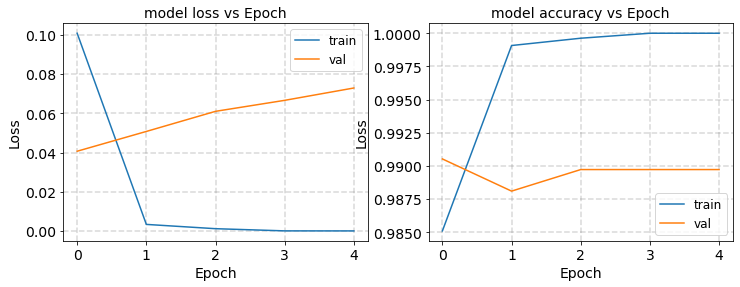

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 2.7079e-06 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 1.0699e-06 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 4.3212e-07 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 1.8239e-07 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 8.3167e-08 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9897


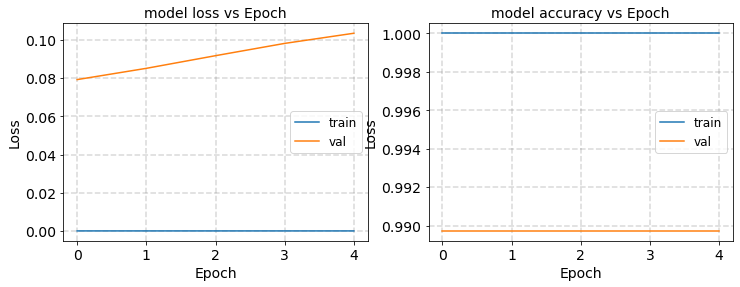

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0872 - accuracy: 0.9866 - val_loss: 0.0724 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0793 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0842 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 5.4155e-05 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 6.2495e-06 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9873


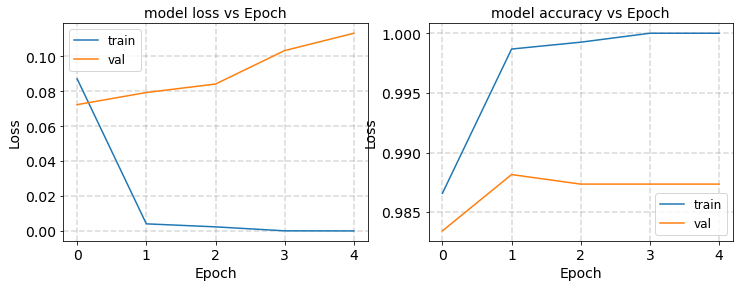

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1150 - accuracy: 0.9744 - val_loss: 0.0586 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0776 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0923 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 2.5352e-04 - accuracy: 0.9999 - val_loss: 0.1210 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 1.8371e-05 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9865


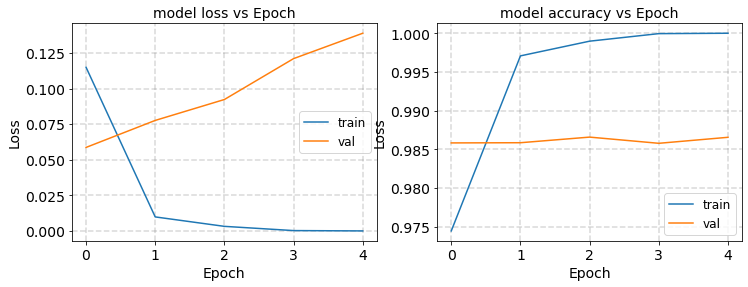

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0681 - accuracy: 0.9848 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0816 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 8.5325e-05 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 1.5295e-05 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 6.1160e-06 - accuracy: 1.0000 - val_loss: 0.1069 - val_accuracy: 0.9865


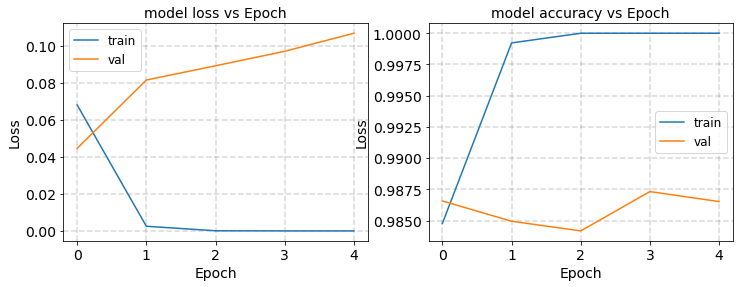

round2 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0732 - accuracy: 0.9854 - val_loss: 0.0711 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0973 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 6.6665e-05 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 3s - loss: 1.4243e-05 - accuracy: 1.0000 - val_loss: 0.1502 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 4.8714e-06 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9850


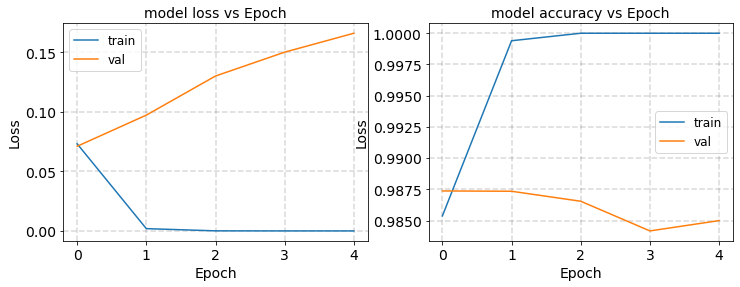

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0629 - accuracy: 0.9893 - val_loss: 0.0615 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 1.6107e-04 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 2.6843e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 3s - loss: 8.0802e-06 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 2.9613e-06 - accuracy: 1.0000 - val_loss: 0.0920 - val_accuracy: 0.9881


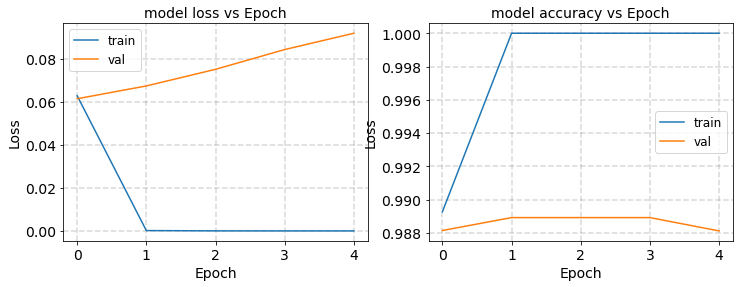

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0840 - accuracy: 0.9884 - val_loss: 0.0414 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.0664 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 6.2728e-04 - accuracy: 0.9998 - val_loss: 0.0528 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 2.7357e-05 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 9.8597e-06 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9905


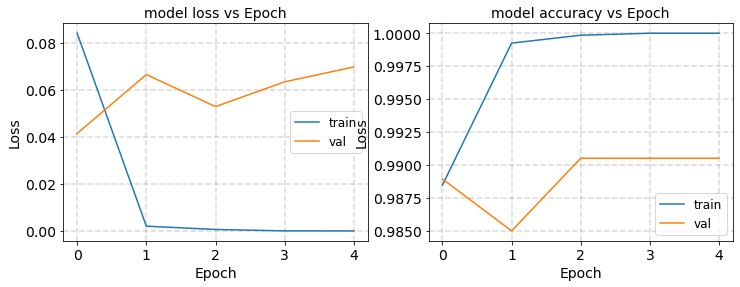

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0668 - accuracy: 0.9877 - val_loss: 0.0513 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0509 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 5.2180e-05 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.5682e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 6.6092e-06 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 0.9874


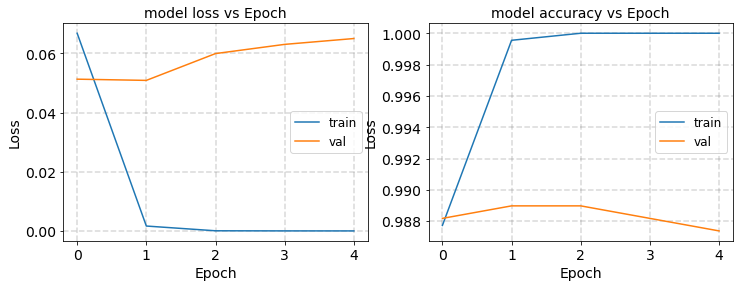

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 128)               32898     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_04_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=0.4,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_04_4_128_run0  1.95752         1.94034      0.0144309   
2389_seq_prune_04_4_128_run1  1.97004         1.98046      0.0139739   
2389_seq_prune_04_4_128_run2  1.88773         1.93015      0.0189888   
2389_seq_prune_04_4_128_run3  1.92448         1.91548      0.0137965   
2389_seq_prune_04_4_128_run4  1.92409         1.99758       0.024727   
2389_seq_prune_04_4_128_run5  1.89529         1.89967      0.0138691   
2389_seq_prune_04_4_128_run6  1.97175         1.96938      0.0494147   
2389_seq_prune_04_4_128_run7  1.95554         1.98016      0.0172638   
2389_seq_prune_04_4_128_run8  1.92703         1.95044      0.0185987   
2389_seq_prune_04_4_128_run9   1.9569         1.94628      0.0178608   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_04_4_128_run0     0.00322686         90     0.2           No   
2389_seq_prune_04_4_128_run1     0.00312466         20     0.4           No   
2389_seq_prune_04_4_128_run2     0.00424602          0       0          Yes   
2389_seq_prune_04_4_128_run3     0.00308498         65     0.7           No   
2389_seq_prune_04_4_128_run4     0.00552912          0       0          Yes   
2389_seq_prune_04_4_128_run5     0.00310124         40     0.8           No   
2389_seq_prune_04_4_128_run6      0.0110495         45     0.9           No   
2389_seq_prune_04_4_128_run7      0.0038603          5     0.1           No   
2389_seq_prune_04_4_128_run8      0.0041588          5     0.1           No   
2389_seq_prune_04_4_128_run9      0.0039938         85     0.3           No   

                             Direction  Accuracy  
2389_seq_prune_04_4_128_run0    larger  0.949525  
2389_seq_prune_04_4_128_run1   smaller   0.95895  
2389_seq_prune_04_4_128_run2   smaller  0.951875  
2389_seq_prune_04_4_128_run3    larger    0.9406  
2389_seq_prune_04_4_128_run4   smaller   0.91945  
2389_seq_prune_04_4_128_run5   smaller   0.95185  
2389_seq_prune_04_4_128_run6   smaller    0.9478  
2389_seq_prune_04_4_128_run7   smaller  0.947825  
2389_seq_prune_04_4_128_run8   smaller  0.938375  
2389_seq_prune_04_4_128_run9    larger   0.93535

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_04_4_128_run0  1.95752         1.94034      0.0144309   
2389_seq_prune_04_4_128_run1  1.97004         1.98046      0.0139739   
2389_seq_prune_04_4_128_run2  1.88773         1.93015      0.0189888   
2389_seq_prune_04_4_128_run3  1.92448         1.91548      0.0137965   
2389_seq_prune_04_4_128_run4  1.92409         1.99758       0.024727   
2389_seq_prune_04_4_128_run5  1.89529         1.89967      0.0138691   
2389_seq_prune_04_4_128_run6  1.97175         1.96938      0.0494147   
2389_seq_prune_04_4_128_run7  1.95554         1.98016      0.0172638   
2389_seq_prune_04_4_128_run8  1.92703         1.95044      0.0185987   
2389_seq_prune_04_4_128_run9   1.9569         1.94628      0.0178608   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_04_4_128_run0     0.00322686         90     0.2           No   
2389_seq_prune_04_4_128_run1     0.00312466         20     0.4           No   
2389_seq_prune_04_4_128_run2     0.00424602          0       0          Yes   
2389_seq_prune_04_4_128_run3     0.00308498         65     0.7           No   
2389_seq_prune_04_4_128_run4     0.00552912          0       0          Yes   
2389_seq_prune_04_4_128_run5     0.00310124         40     0.8           No   
2389_seq_prune_04_4_128_run6      0.0110495         45     0.9           No   
2389_seq_prune_04_4_128_run7      0.0038603          5     0.1           No   
2389_seq_prune_04_4_128_run8      0.0041588          5     0.1           No   
2389_seq_prune_04_4_128_run9      0.0039938         85     0.3           No   

                             Direction  Accuracy  
2389_seq_prune_04_4_128_run0    larger  0.949525  
2389_seq_prune_04_4_128_run1   smaller   0.95895  
2389_seq_prune_04_4_128_run2   smaller  0.951875  
2389_seq_prune_04_4_128_run3    larger    0.9406  
2389_seq_prune_04_4_128_run4   smaller   0.91945  
2389_seq_prune_04_4_128_run5   smaller   0.95185  
2389_seq_prune_04_4_128_run6   smaller    0.9478  
2389_seq_prune_04_4_128_run7   smaller  0.947825  
2389_seq_prune_04_4_128_run8   smaller  0.938375  
2389_seq_prune_04_4_128_run9    larger   0.93535

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.07576214,  0.07311507],
       [ 0.05450537, -0.04409927, -0.        , ...,  0.04287448,
        -0.07690701, -0.04855578],
       [ 0.05186389,  0.06629287, -0.075463  , ..., -0.0574872 ,
        -0.0414518 ,  0.        ],
       ...,
       [-0.        , -0.06813258, -0.        , ...,  0.        ,
        -0.        ,  0.07494638],
       [ 0.04044035, -0.07296803,  0.0417719 , ...,  0.05351888,
         0.03468665, -0.        ],
       [-0.        , -0.07791641,  0.05591289, ...,  0.        ,
         0.        ,  0.05882341]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.957515433823408
1.9403369730421391
0.014430941969158248
0.003226856722239251
90.0
0.2
No
larger
0.949524998664856
